In [2]:
%cd ..
%ls

C:\Users\Dongmin Kim\Documents\OnlineTSAD
 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 067D-FB3E

 C:\Users\Dongmin Kim\Documents\OnlineTSAD 디렉터리

2023-03-24  오후 01:39    <DIR>          .
2023-03-24  오후 01:39    <DIR>          ..
2023-03-17  오후 04:13               141 .gitignore
2023-03-24  오후 05:54    <DIR>          .idea
2023-03-17  오후 04:38    <DIR>          cfgs
2023-03-23  오후 04:34    <DIR>          data
2023-03-24  오후 05:55    <DIR>          EDA
2023-03-24  오후 05:48    <DIR>          Exp
2023-03-14  오후 01:21    <DIR>          models
2023-03-24  오후 01:39             3,097 test.py
2023-03-15  오후 03:49             3,099 train.py
2023-03-22  오후 08:37    <DIR>          utils
               3개 파일               6,337 바이트
               9개 디렉터리  139,826,626,560 바이트 남음


In [1]:
import pickle
import os
import matplotlib.pyplot as plt

## Load

In [2]:
base_dir = "../data/WADI/"
os.listdir(base_dir)

['WADI_14days_new.csv', 'table_WADI.pdf', 'WADI_attackdataLABLE.csv']

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(os.path.join(base_dir, 'WADI_14days_new.csv'), index_col=0)

In [5]:
df

Date     Time  1_AIT_001_PV  1_AIT_002_PV  1_AIT_003_PV  \
Row                                                                     
1        9/25/2017  00:00.0       171.155      0.619473       11.5759   
2        9/25/2017  00:01.0       171.155      0.619473       11.5759   
3        9/25/2017  00:02.0       171.155      0.619473       11.5759   
4        9/25/2017  00:03.0       171.155      0.607477       11.5725   
5        9/25/2017  00:04.0       171.155      0.607477       11.5725   
...            ...      ...           ...           ...           ...   
1048567    10/7/17  16:06.0       175.855      0.589478       11.8941   
1048568    10/7/17  16:07.0       175.855      0.589478       11.8941   
1048569    10/7/17  16:08.0       175.855      0.589478       11.8941   
1048570    10/7/17  16:09.0       175.896      0.613476       11.8913   
1048571    10/7/17  16:10.0       175.896      0.613476       11.8913   

         1_AIT_004_PV  1_AIT_005_PV  1_FIT_001_PV  1_LS_001_AL  1_LS_002_AL  \
Row                                                                           
1             504.645      0.318319      0.001157            0            0   
2             504.645      0.318319      0.001157            0            0   
3             504.645      0.318319      0.001157            0            0   
4             504.673      0.318438      0.001207            0            0   
5             504.673      0.318438      0.001207            0            0   
...               ...           ...           ...          ...          ...   
1048567       479.191      0.331571      0.001128            0            0   
1048568       479.191      0.331571      0.001128            0            0   
1048569       479.191      0.331571      0.001128            0            0   
1048570       479.224      0.331622      0.001173            0            0   
1048571       479.224      0.331622      0.001173            0            0   

         ...  3_MV_001_STATUS  3_MV_002_STATUS  3_MV_003_STATUS  \
Row      ...                                                      
1        ...                1                1                1   
2        ...                1                1                1   
3        ...                1                1                1   
4        ...                1                1                1   
5        ...                1                1                1   
...      ...              ...              ...              ...   
1048567  ...                1                1                1   
1048568  ...                1                1                1   
1048569  ...                1                1                1   
1048570  ...                1                1                1   
1048571  ...                1                1                1   

         3_P_001_STATUS  3_P_002_STATUS  3_P_003_STATUS  3_P_004_STATUS  \
Row                                                                       
1                     1               1               1               1   
2                     1               1               1               1   
3                     1               1               1               1   
4                     1               1               1               1   
5                     1               1               1               1   
...                 ...             ...             ...             ...   
1048567               1               1               1               1   
1048568               1               1               1               1   
1048569               1               1               1               1   
1048570               1               1               1               1   
1048571               1               1               1               1   

         LEAK_DIFF_PRESSURE  PLANT_START_STOP_LOG  TOTAL_CONS_REQUIRED_FLOW  
Row                                                                          
1                   67.9651     

In [6]:
arr = df.values[:, 2:]

In [7]:
abs(arr)

array([[171.155, 0.619473, 11.5759, ..., 67.9651, 1, 0.68],
       [171.155, 0.619473, 11.5759, ..., 67.9651, 1, 0.68],
       [171.155, 0.619473, 11.5759, ..., 67.9651, 1, 0.68],
       ...,
       [175.855, 0.589478, 11.8941, ..., 60.6305, 1, 0.25],
       [175.896, 0.613476, 11.8913, ..., 60.4477, 1, 0.25],
       [175.896, 0.613476, 11.8913, ..., 60.4477, 1, 0.25]], dtype=object)

In [8]:
arr.min(), arr.max()

(-1286.94, 1742.36)

784571 127


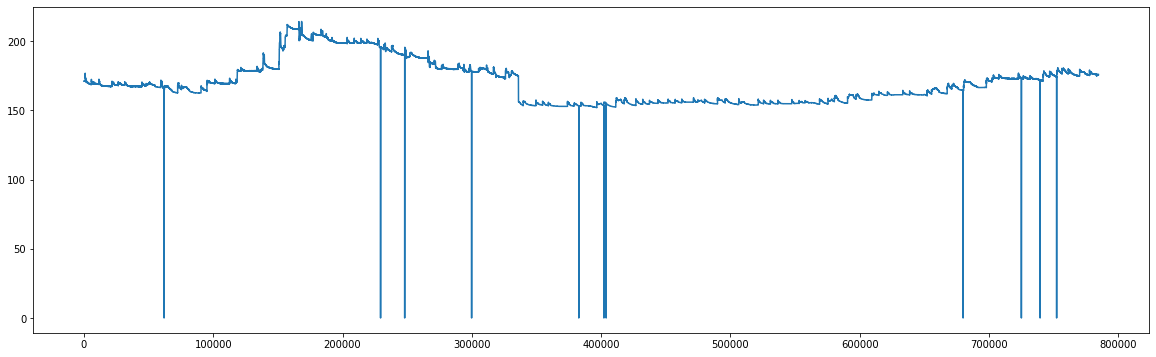

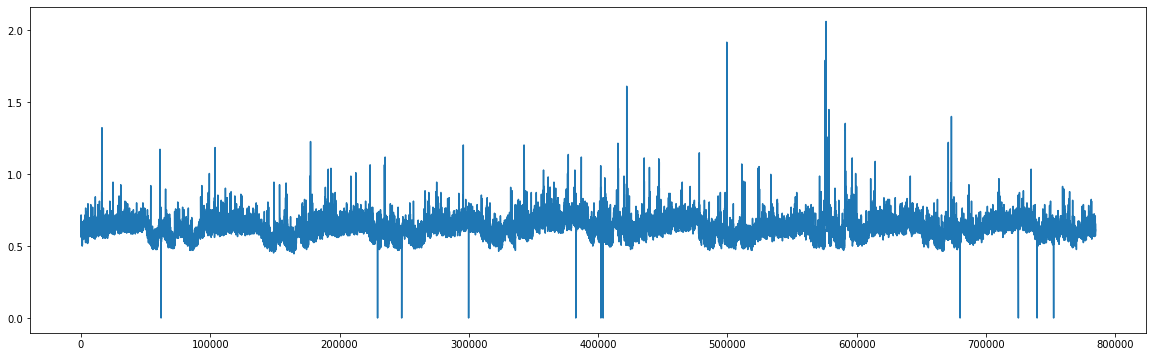

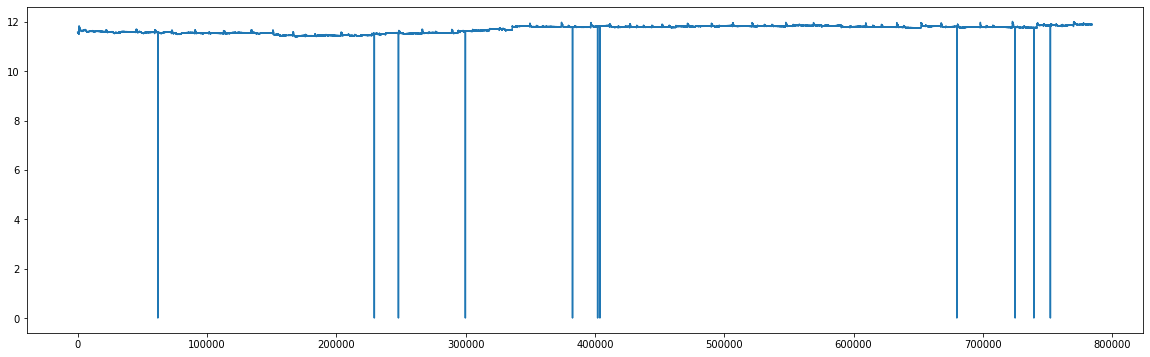

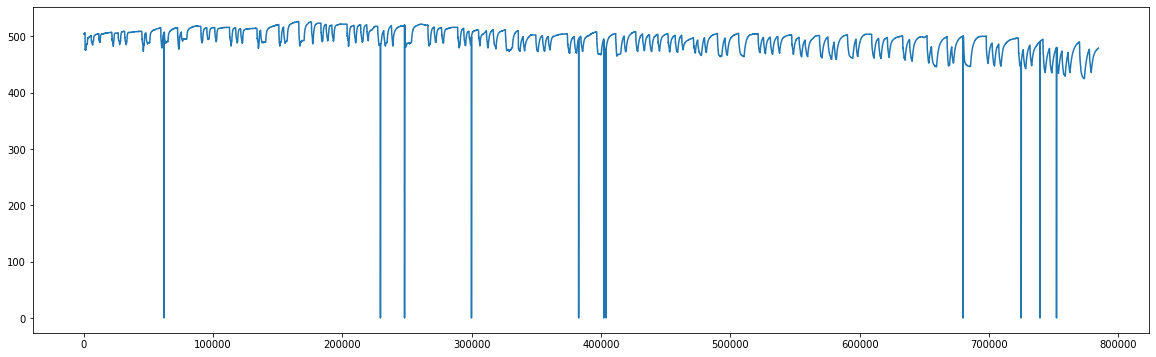

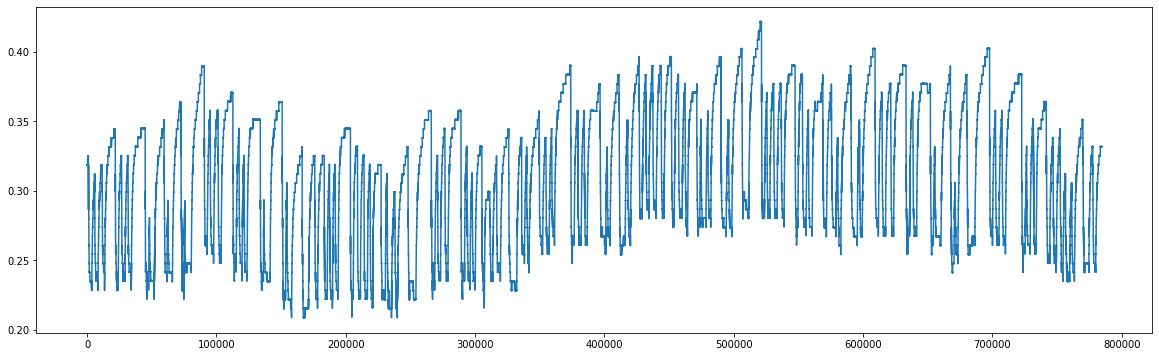

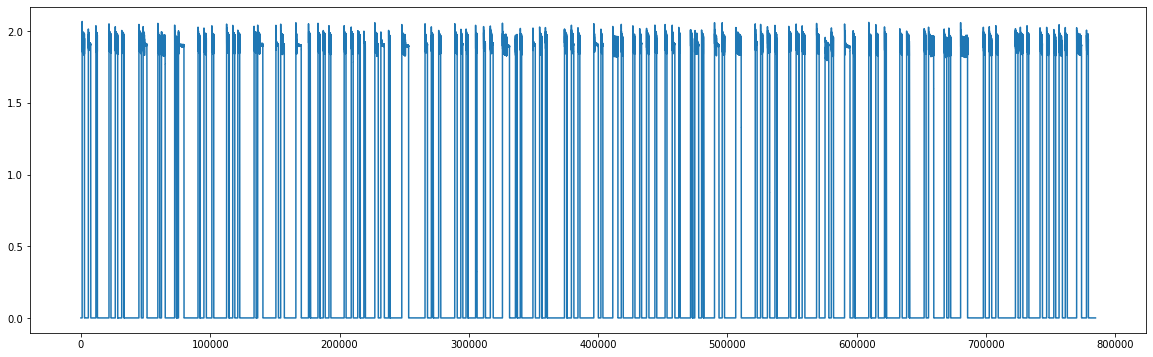

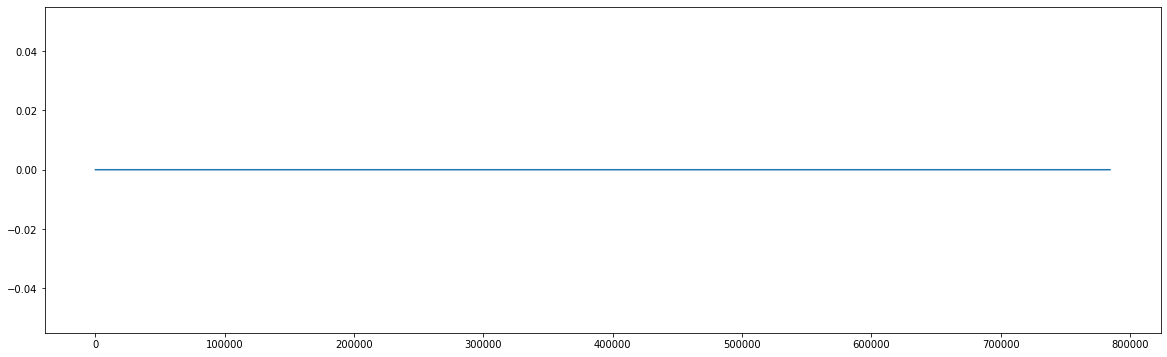

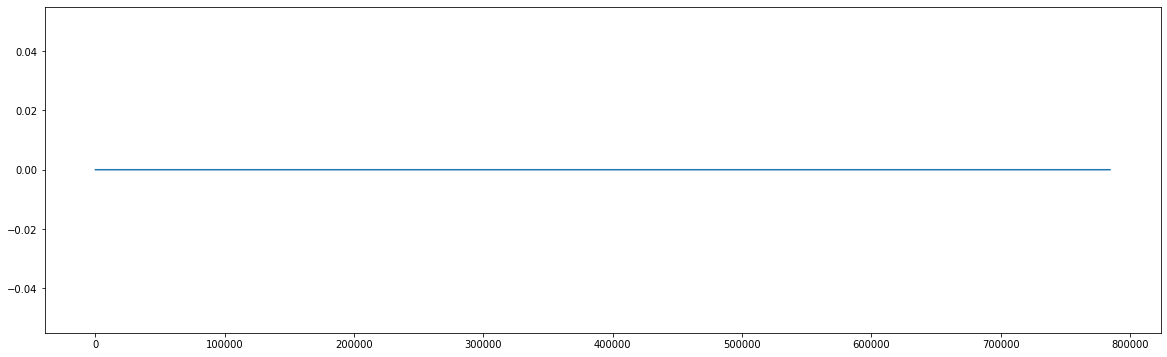

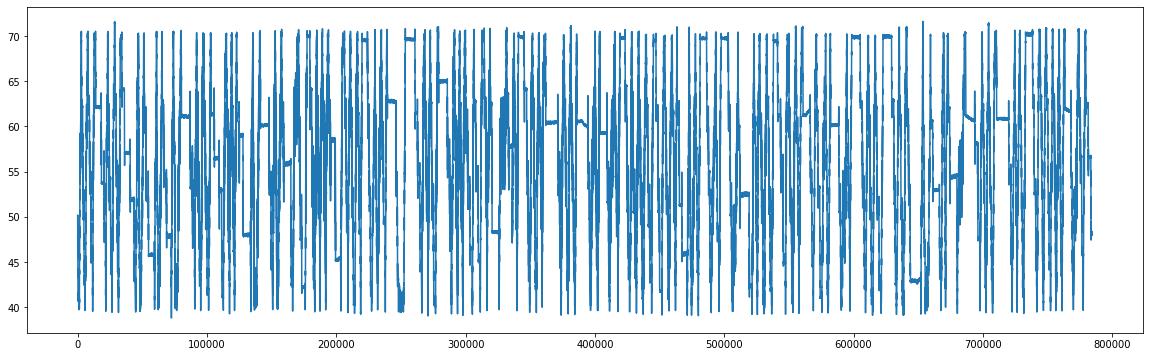

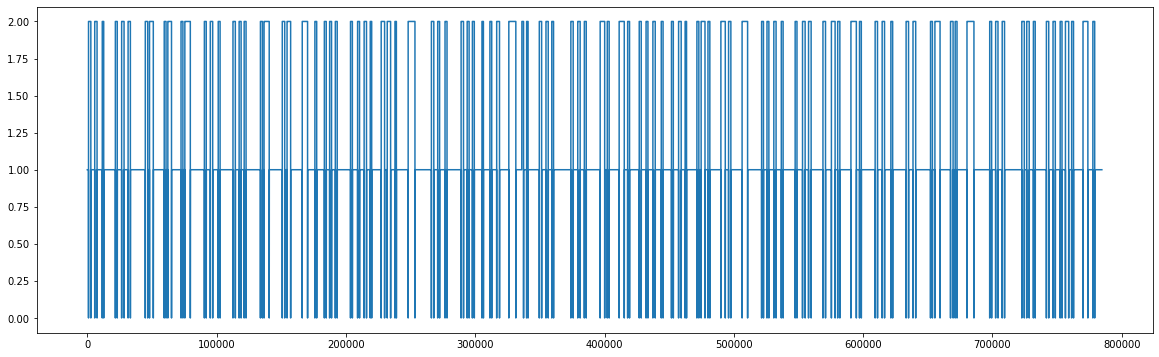

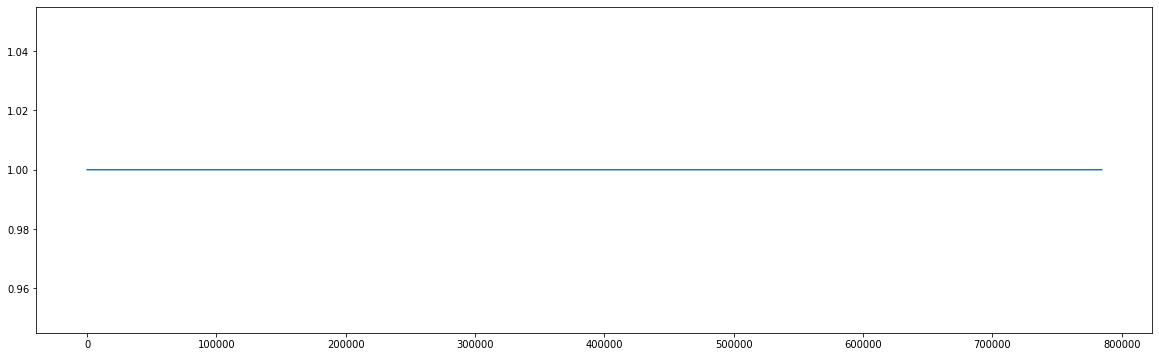

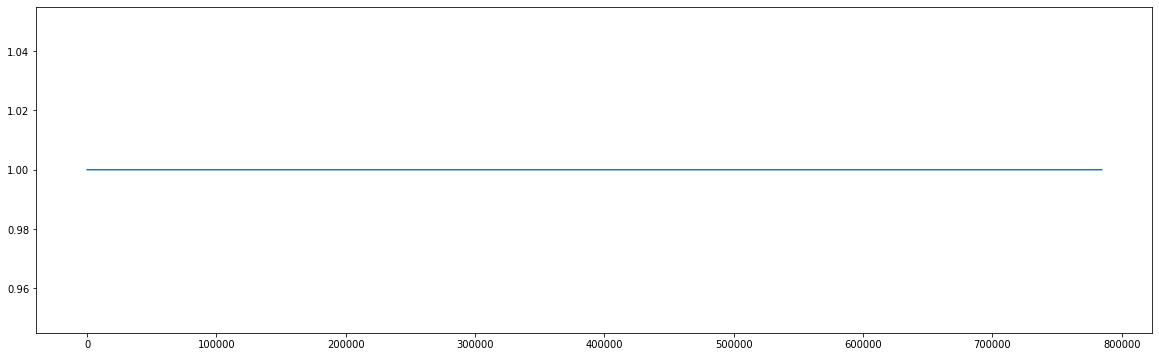

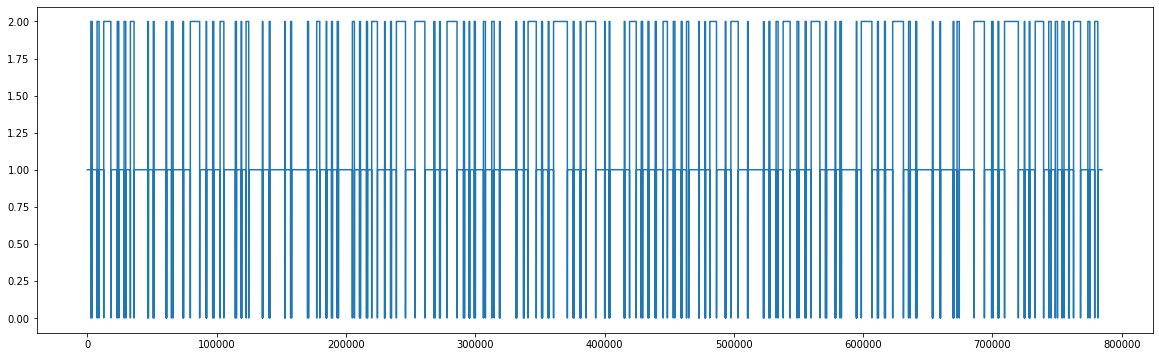

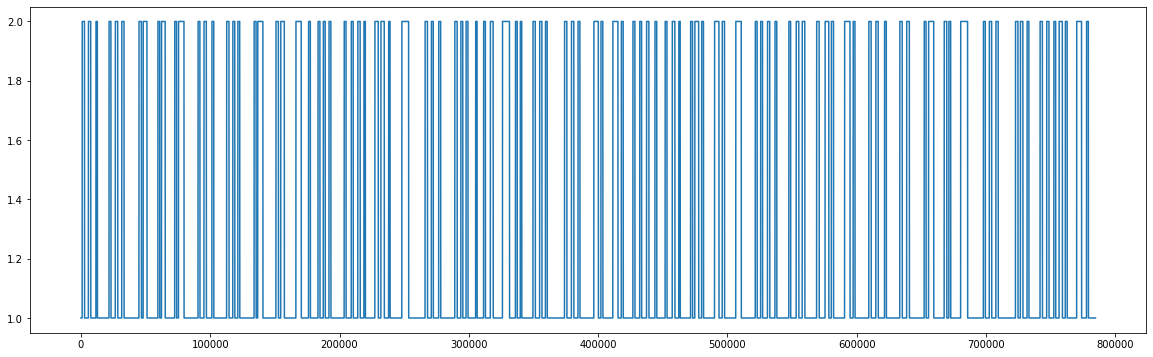

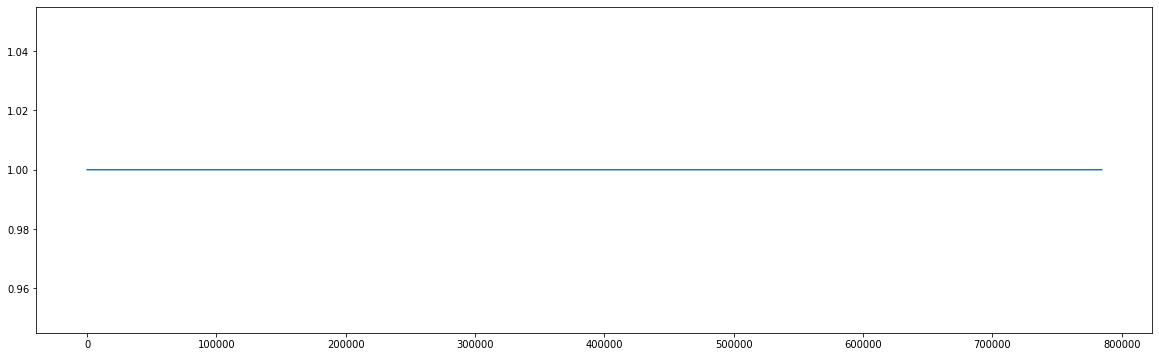

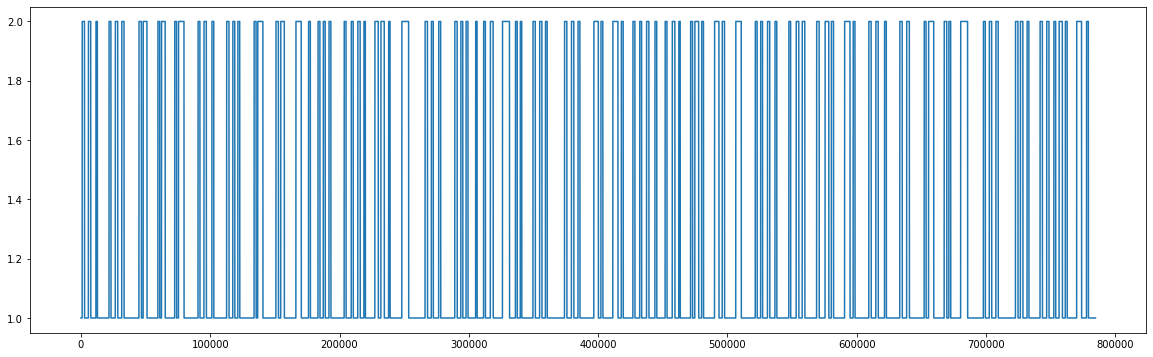

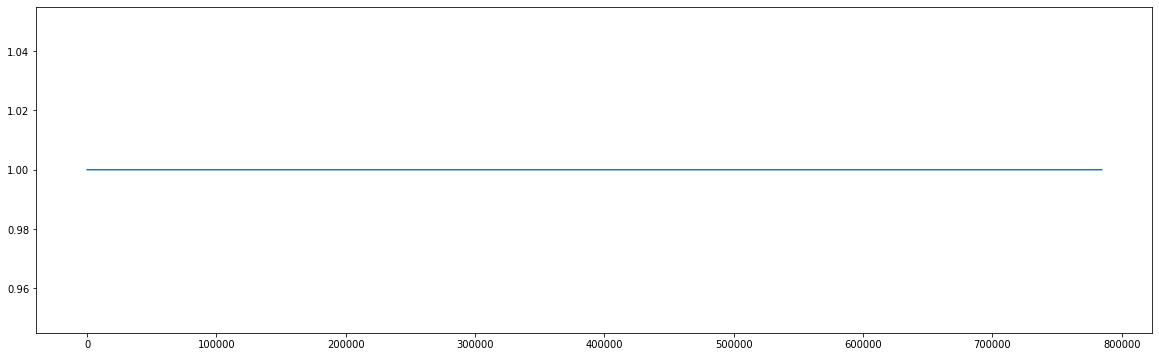

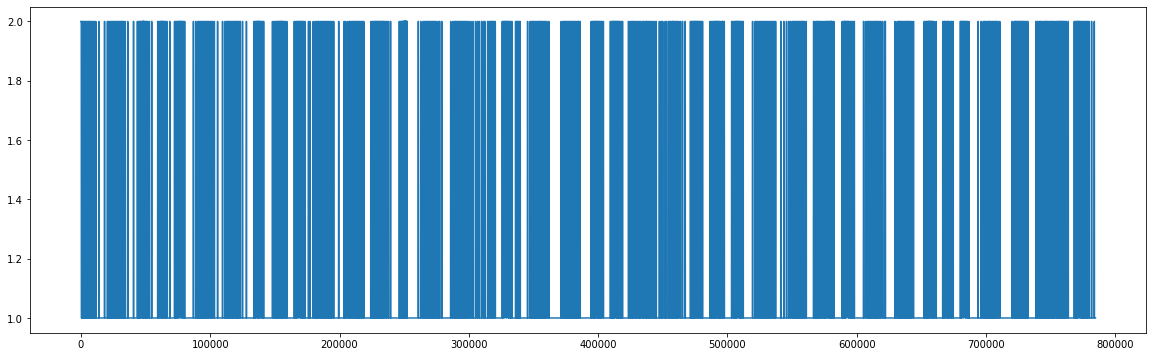

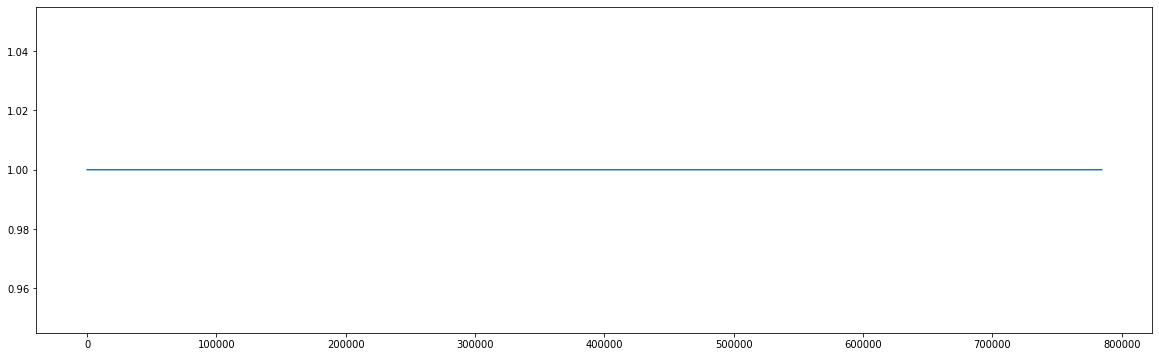

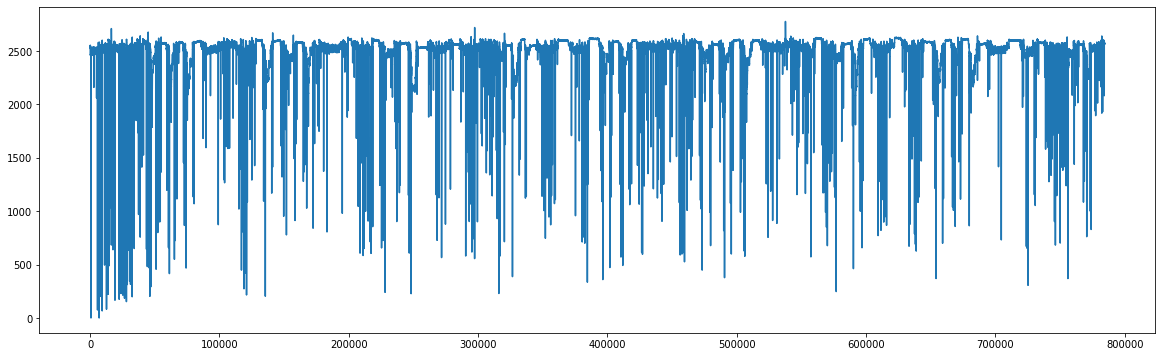

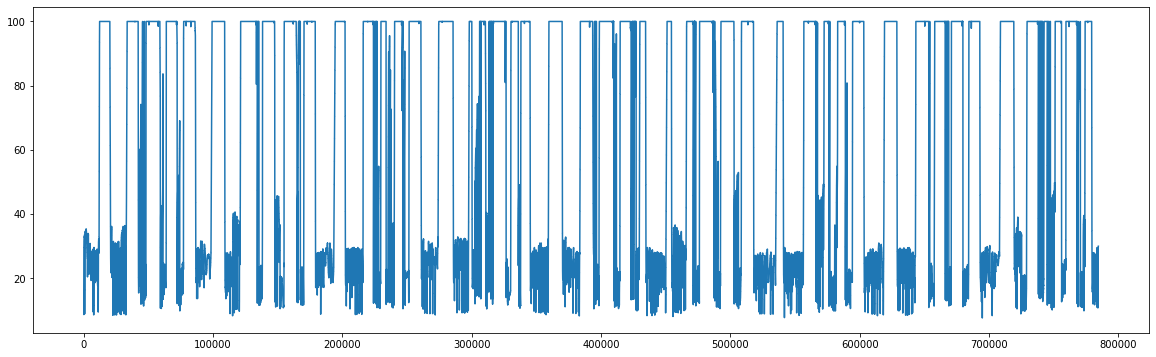

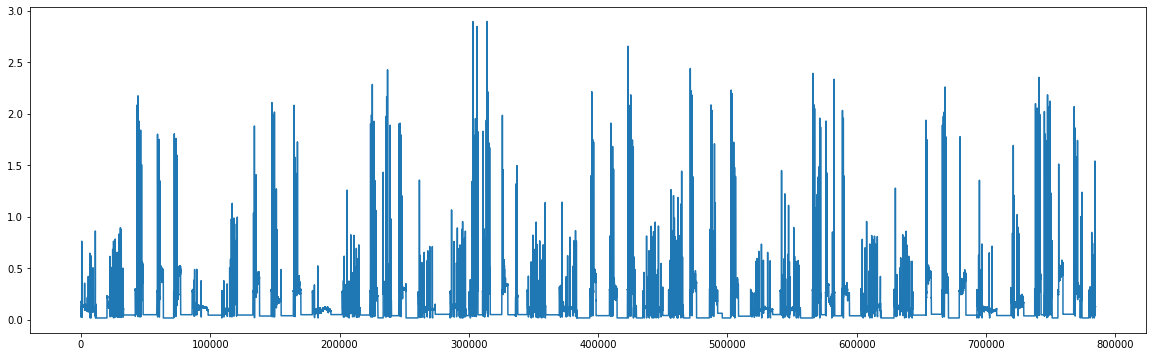

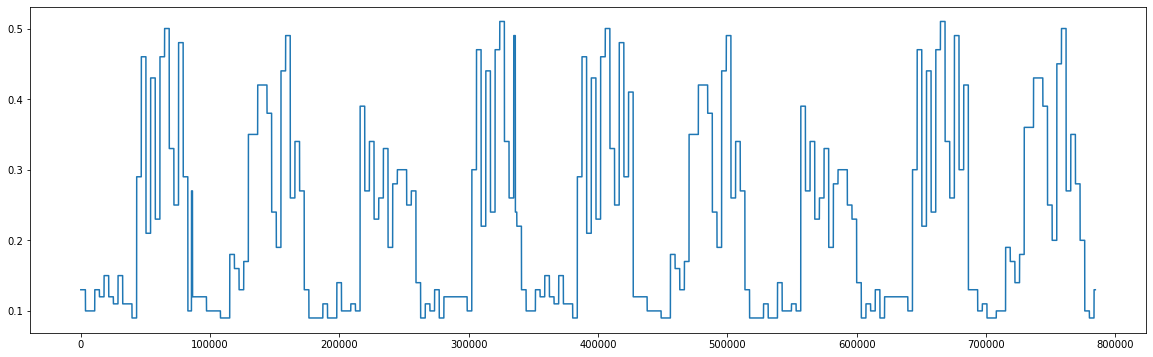

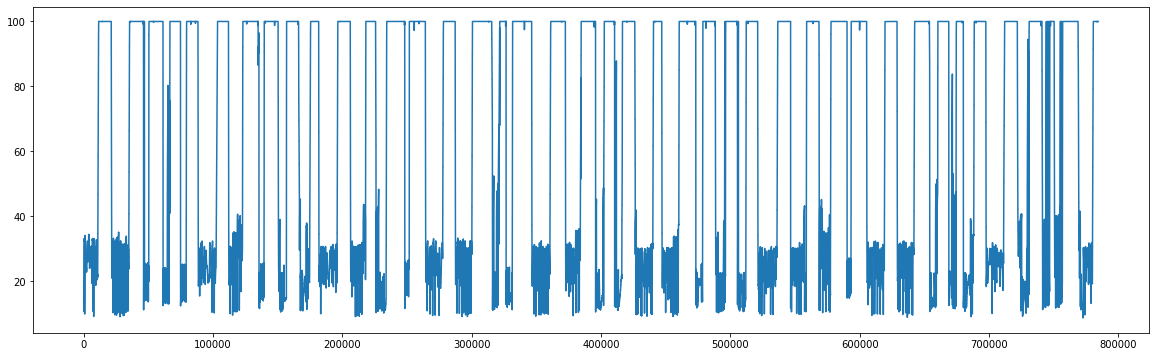

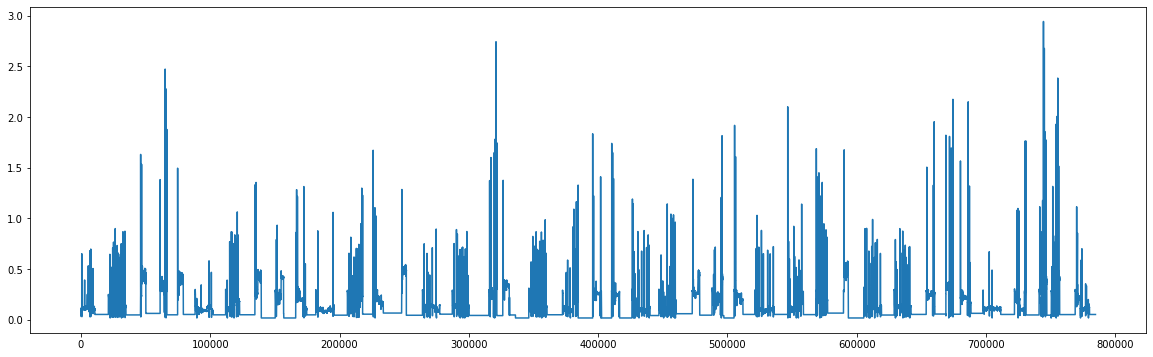

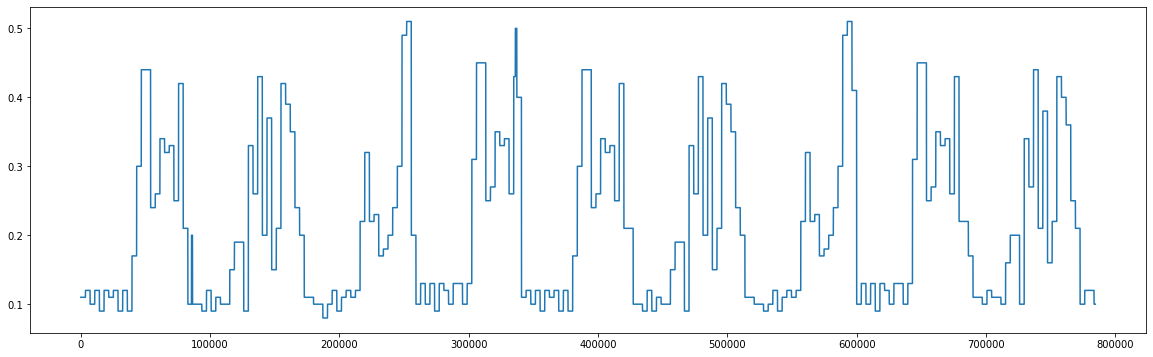

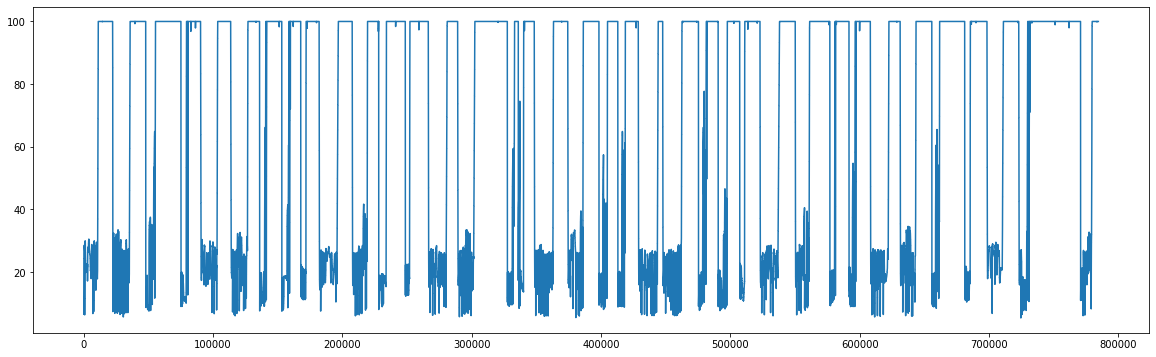

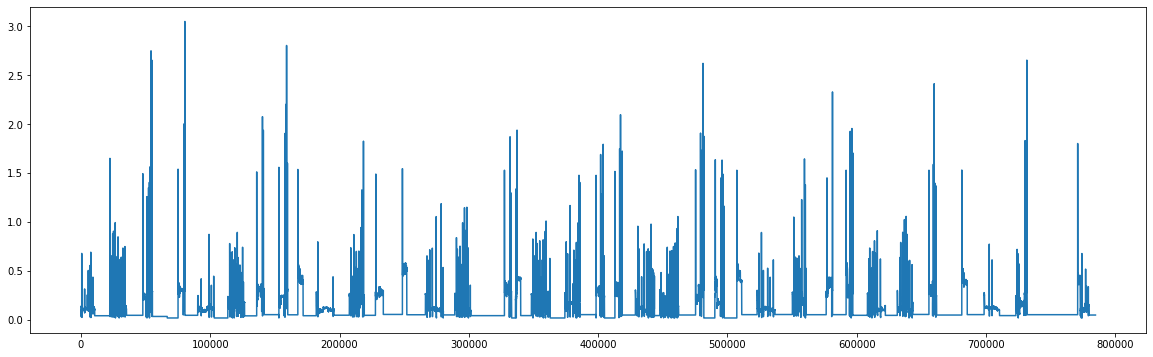

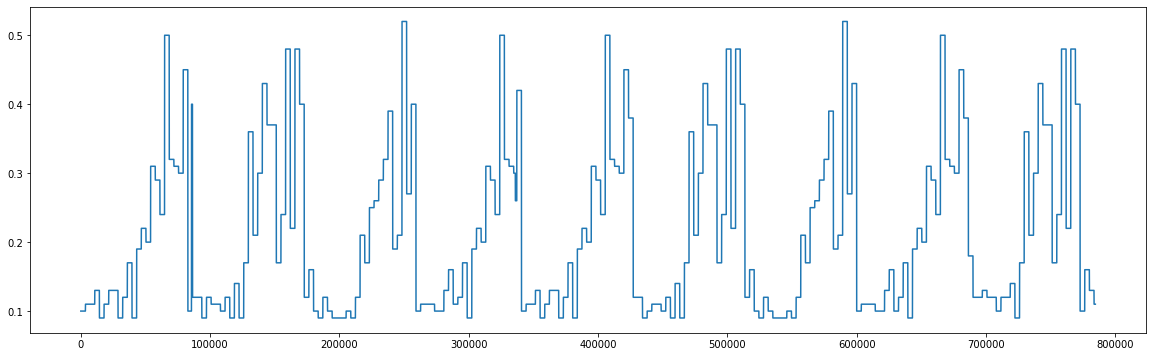

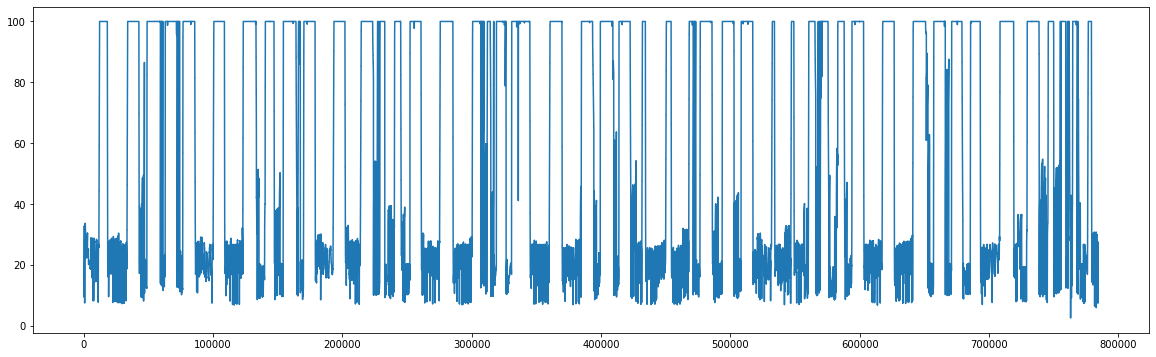

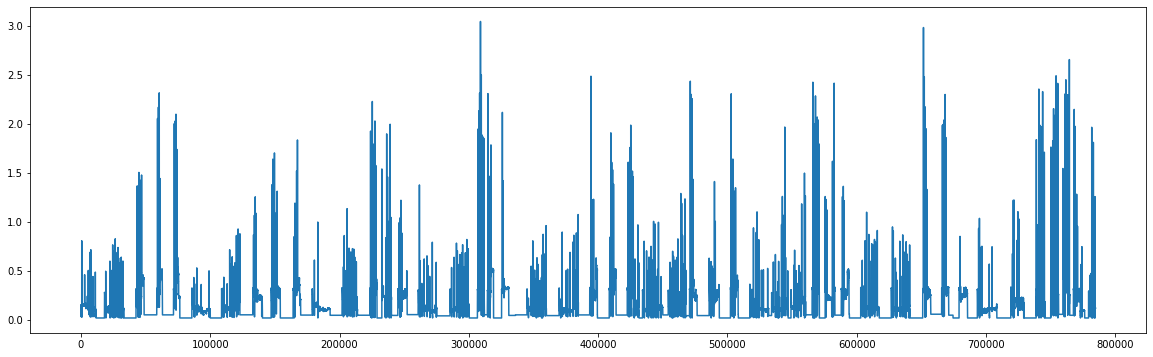

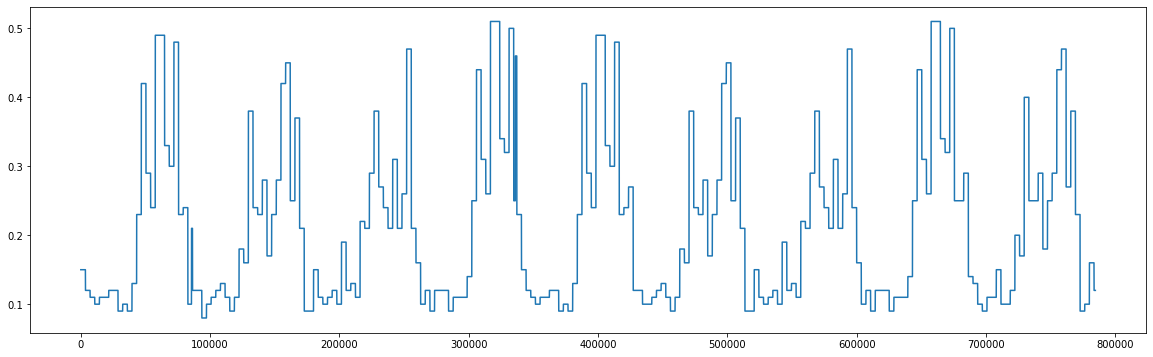

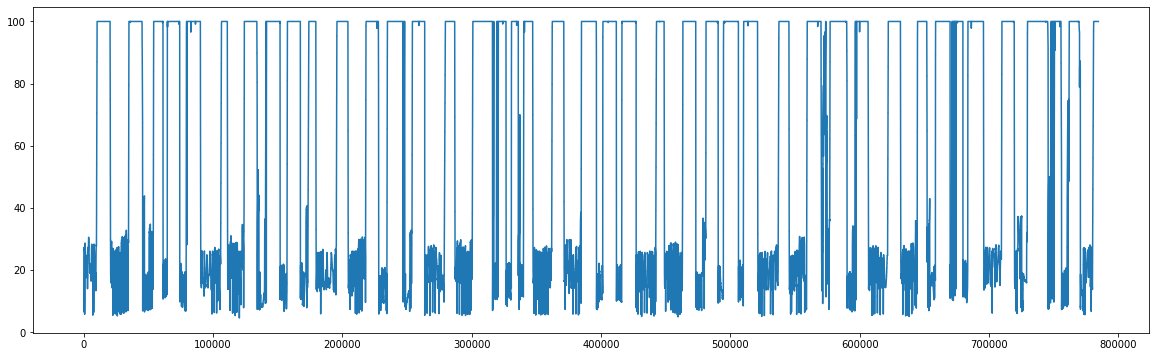

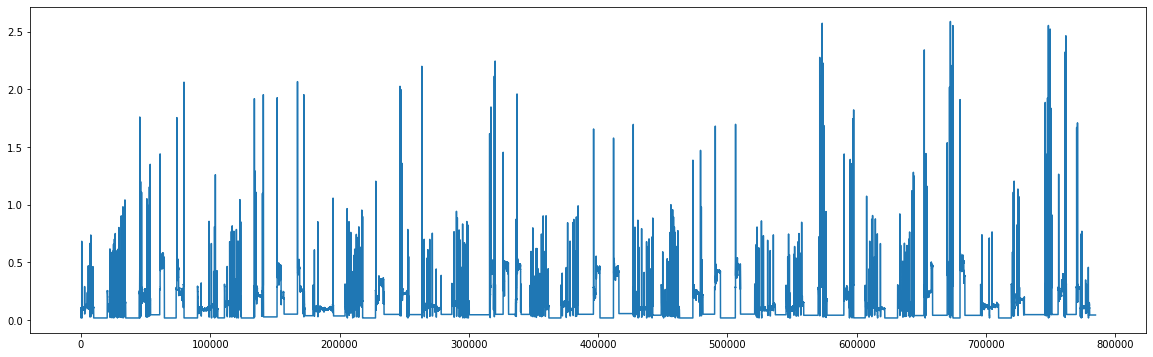

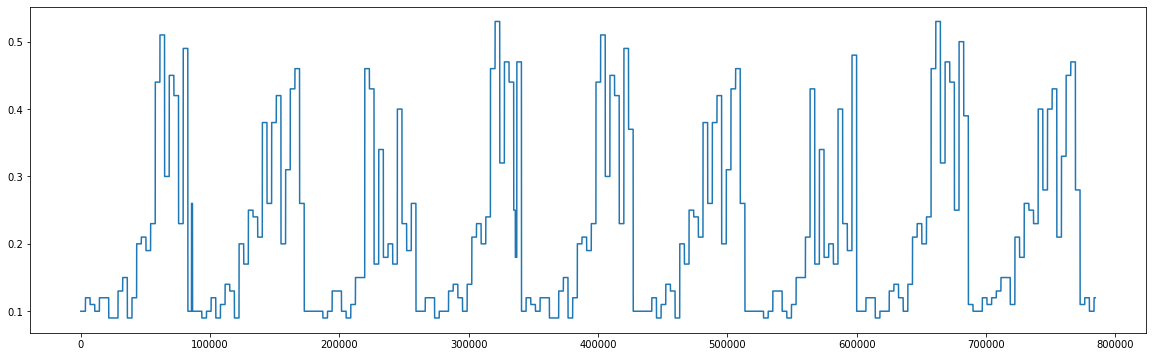

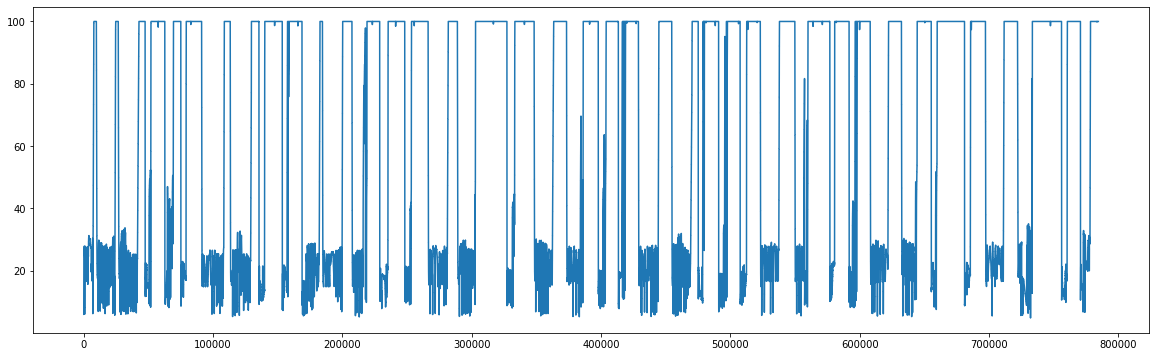

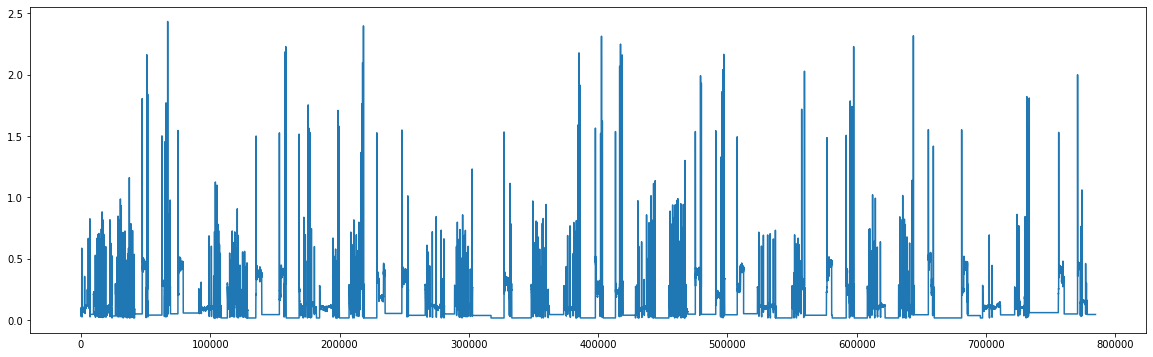

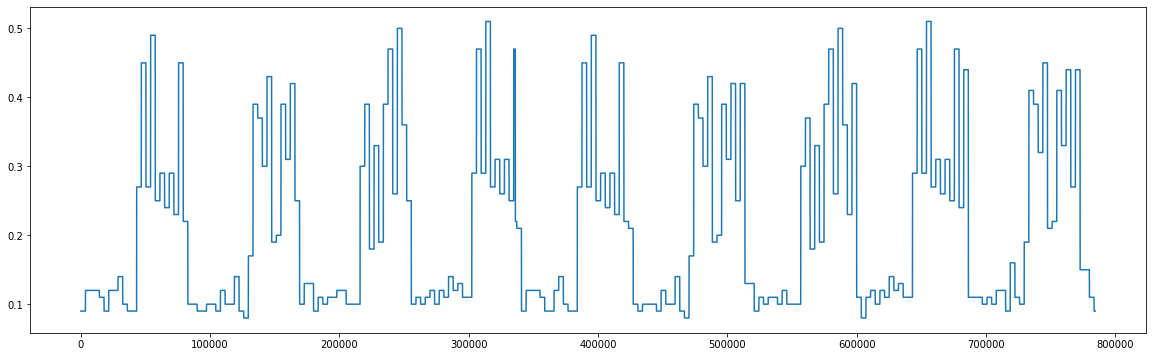

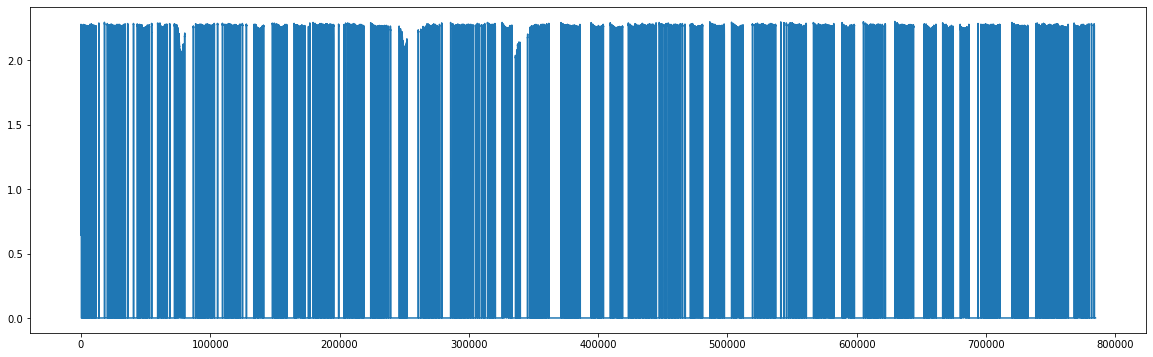

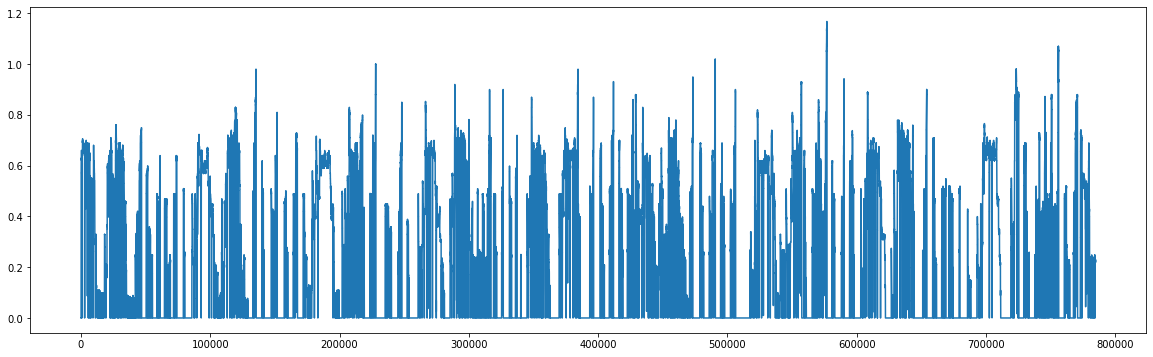

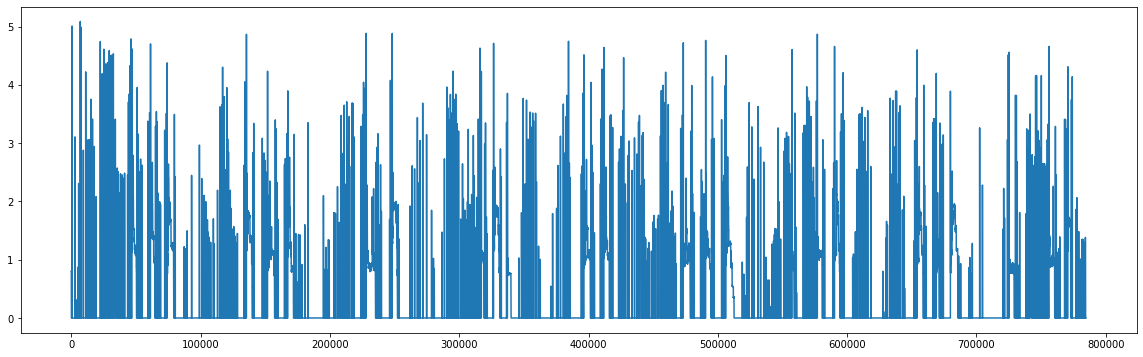

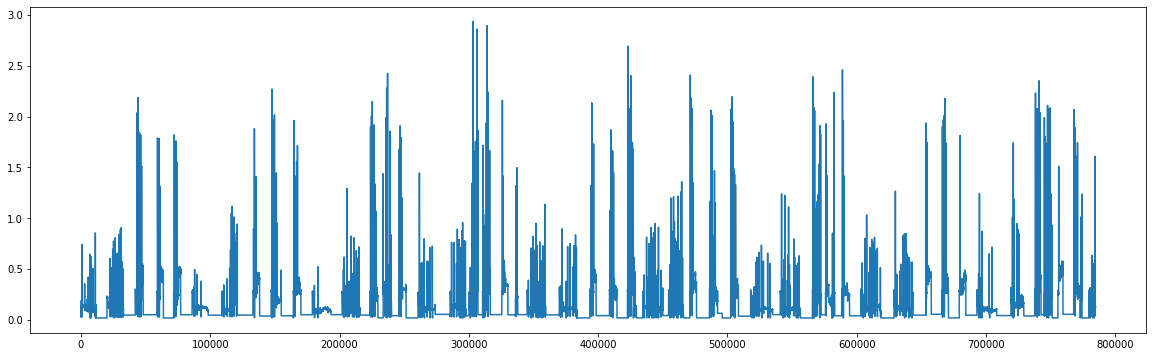

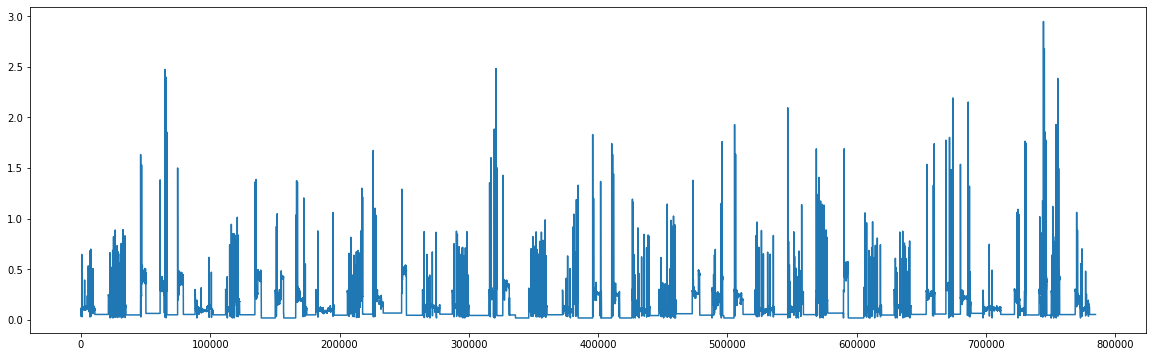

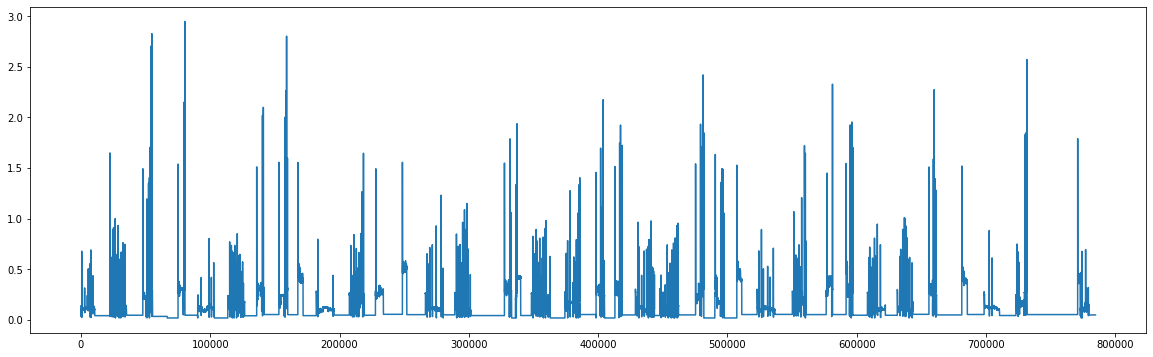

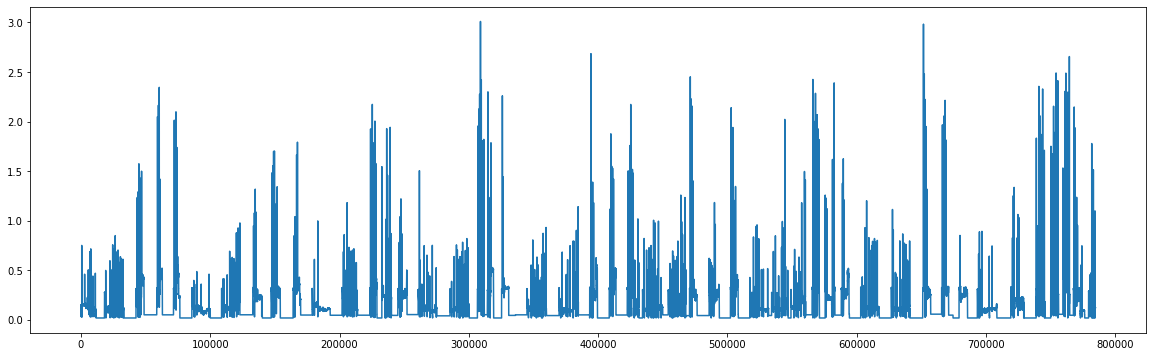

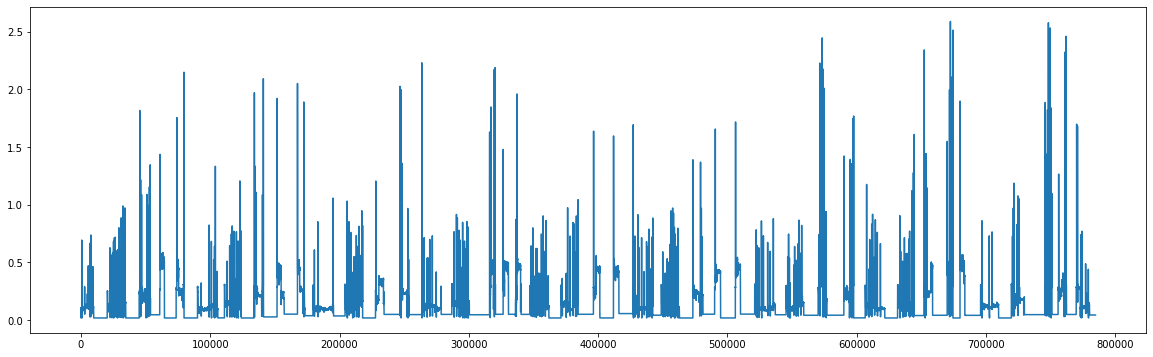

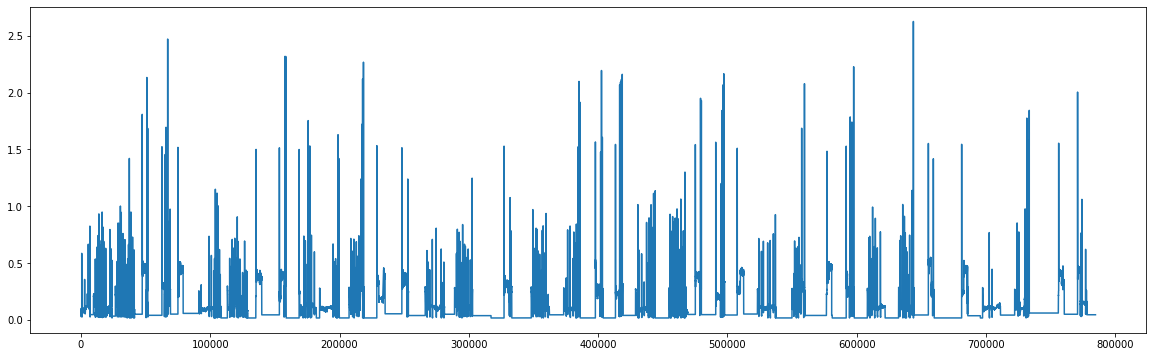

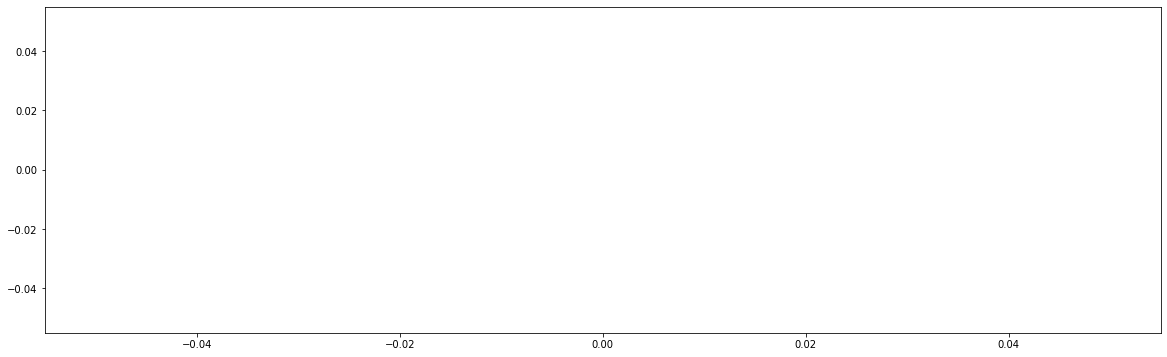

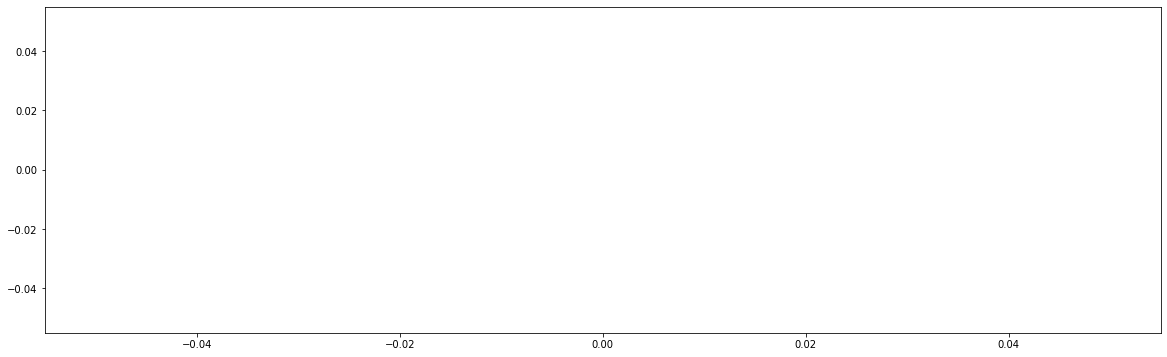

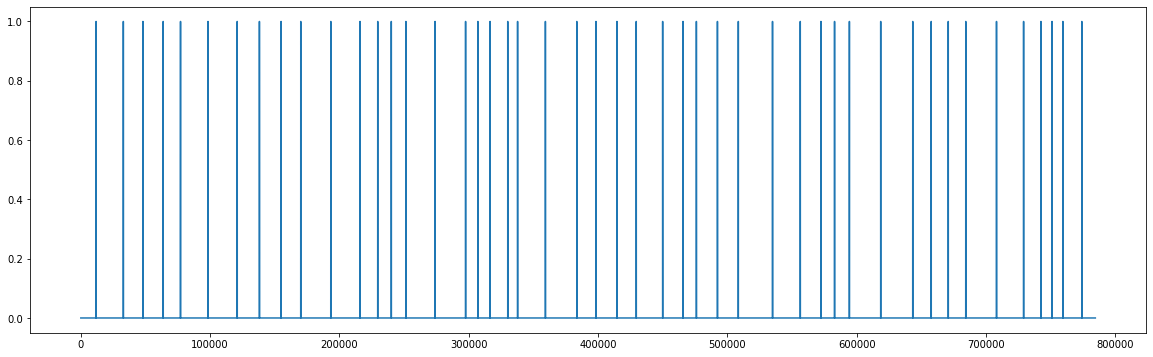

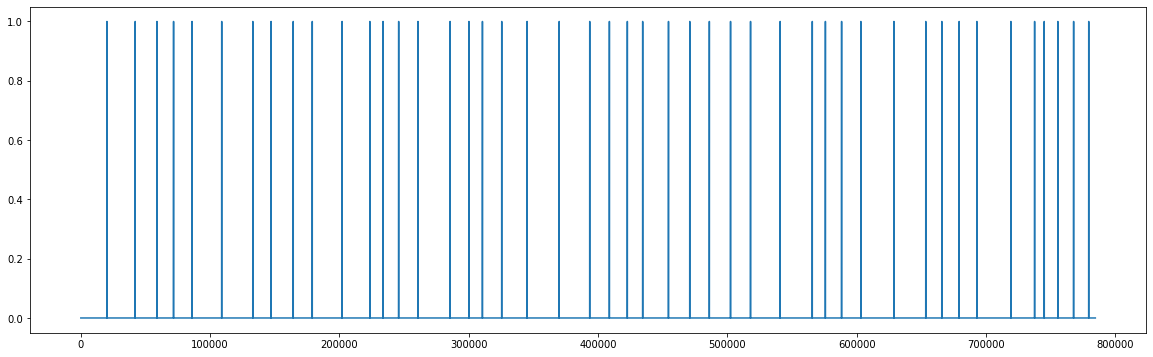

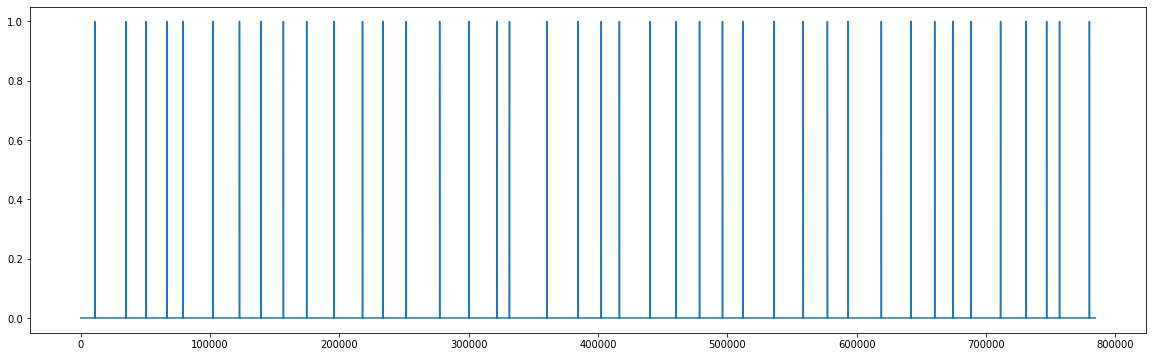

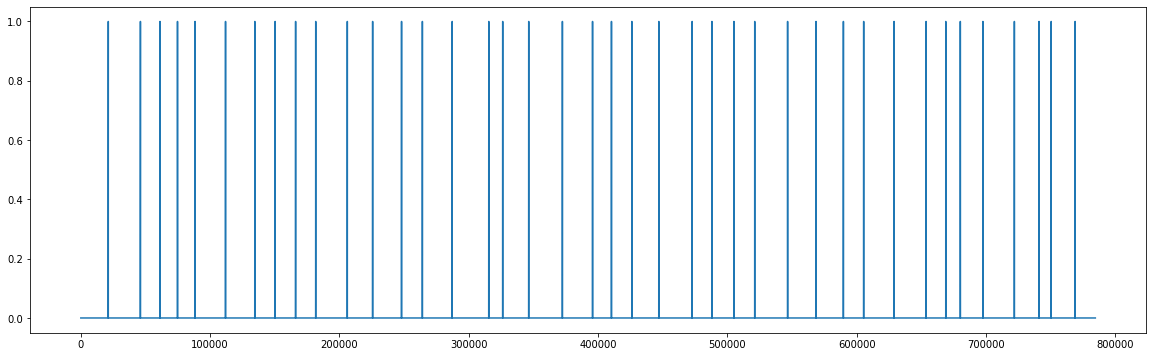

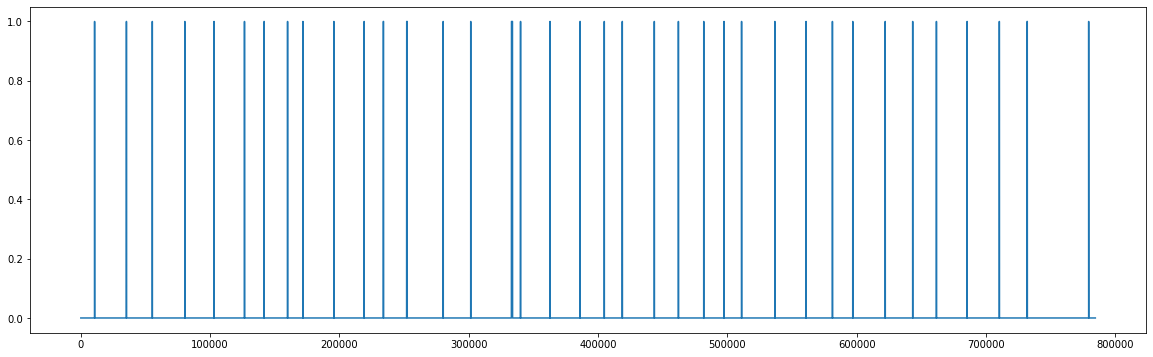

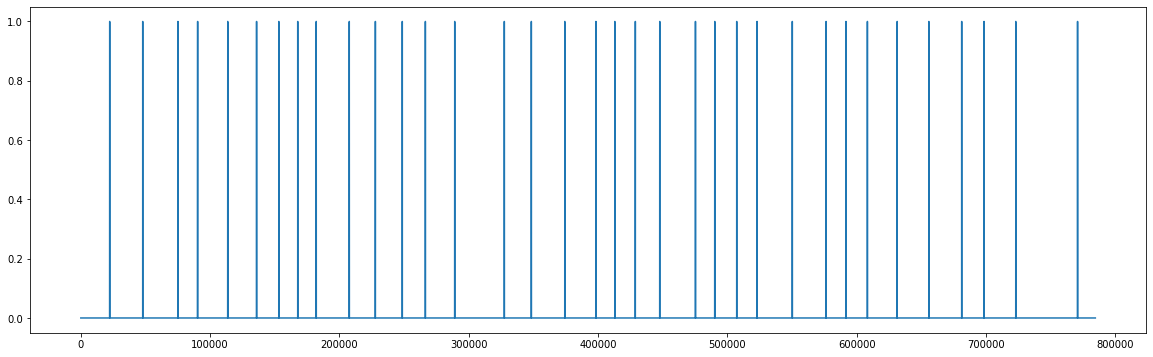

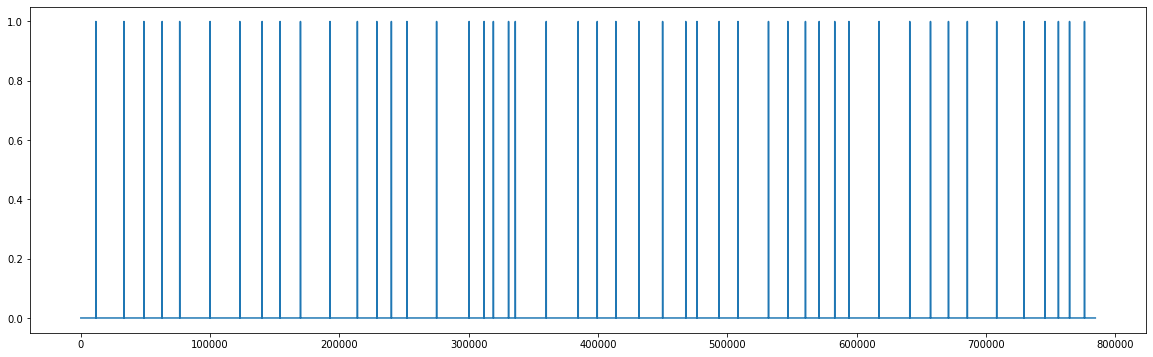

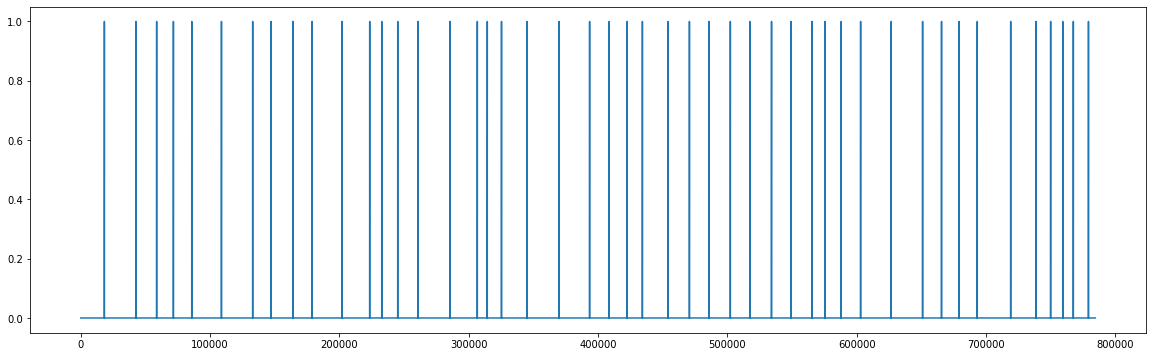

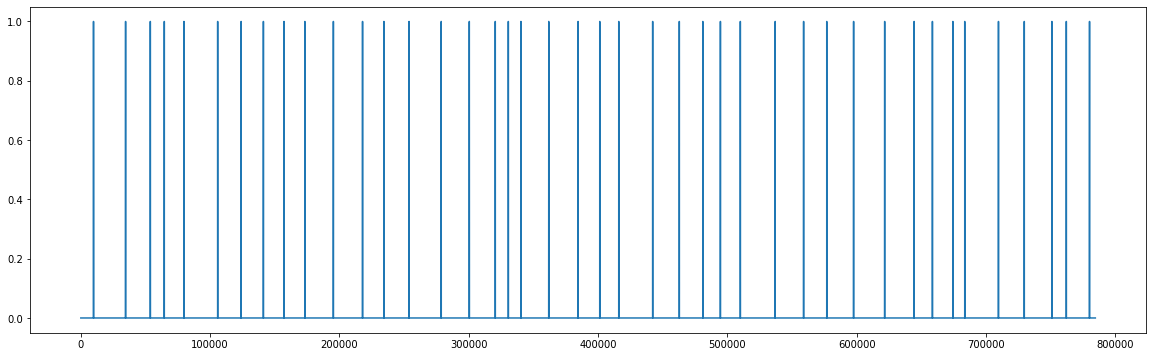

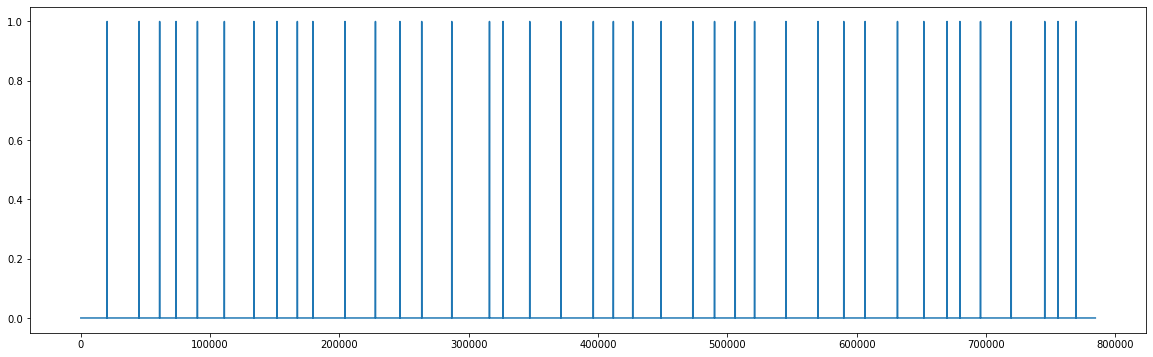

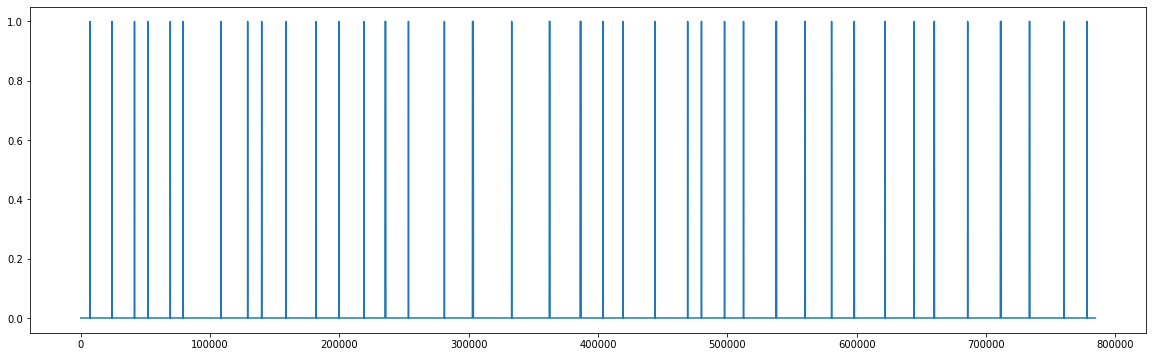

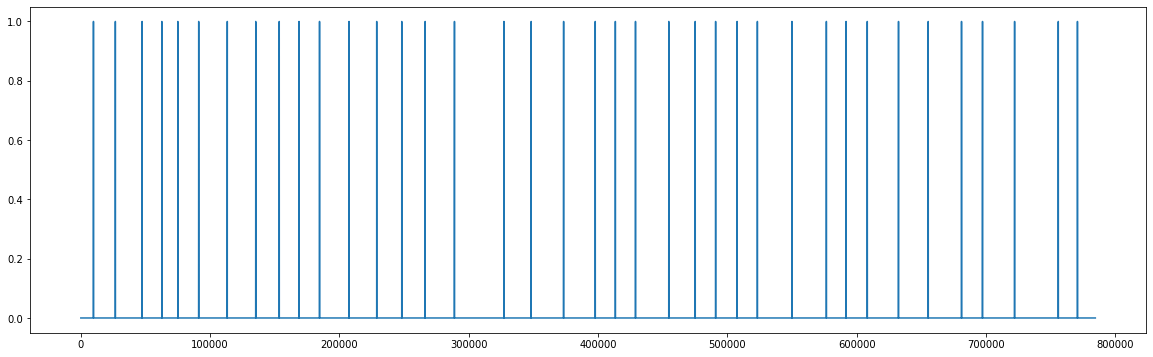

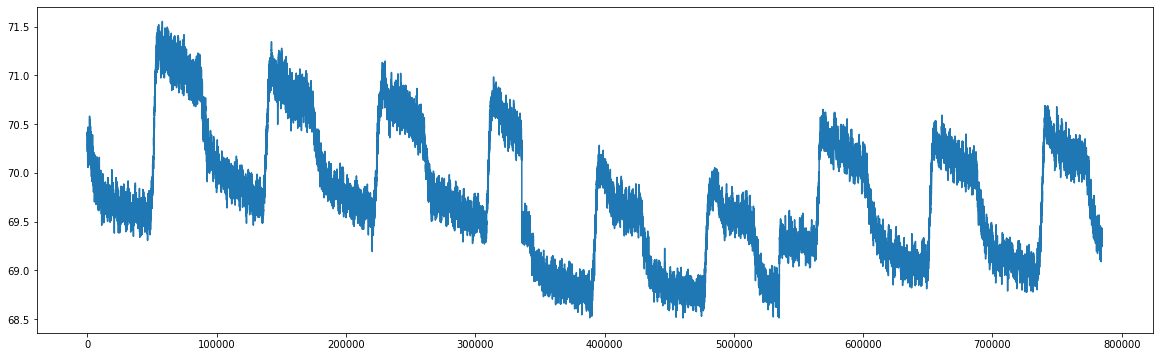

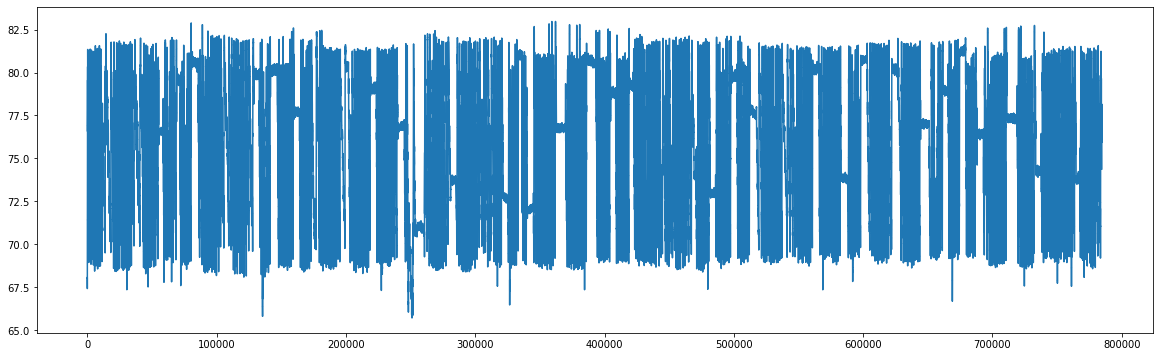

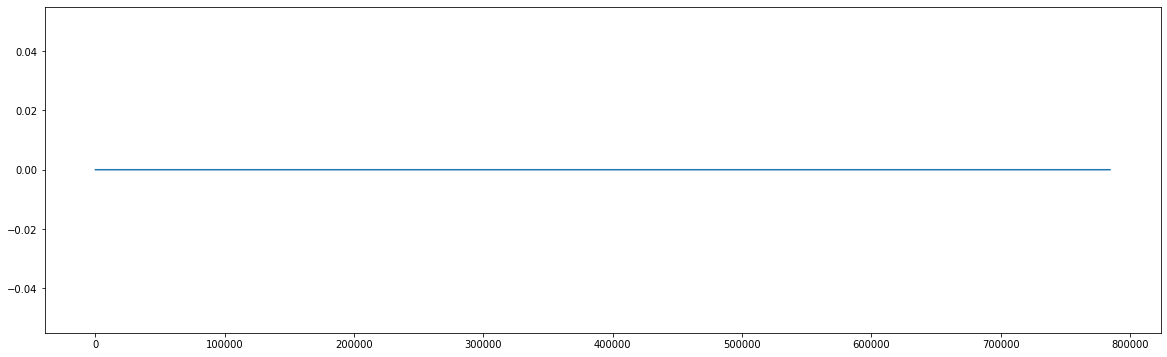

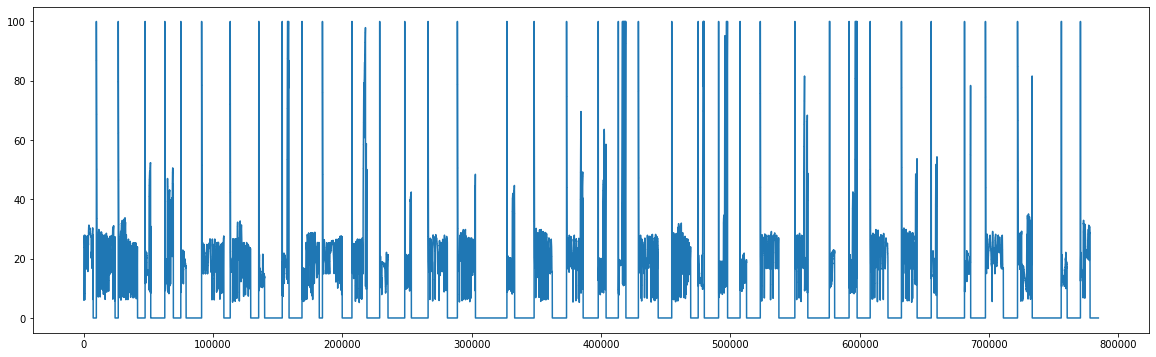

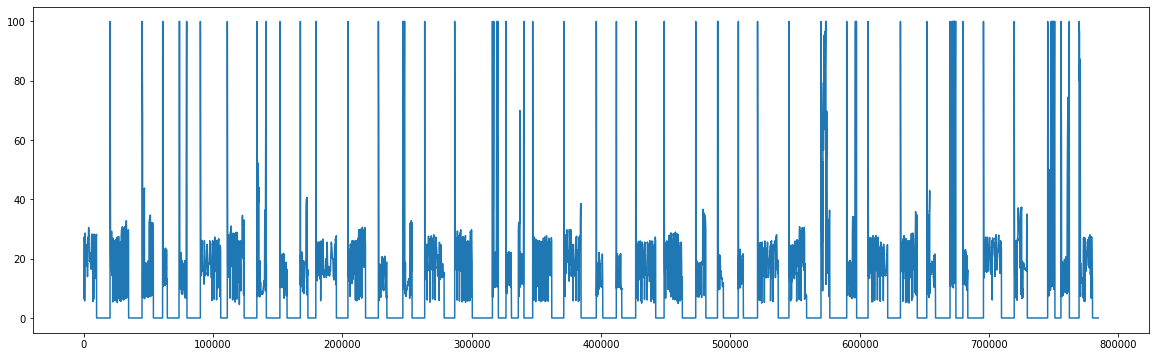

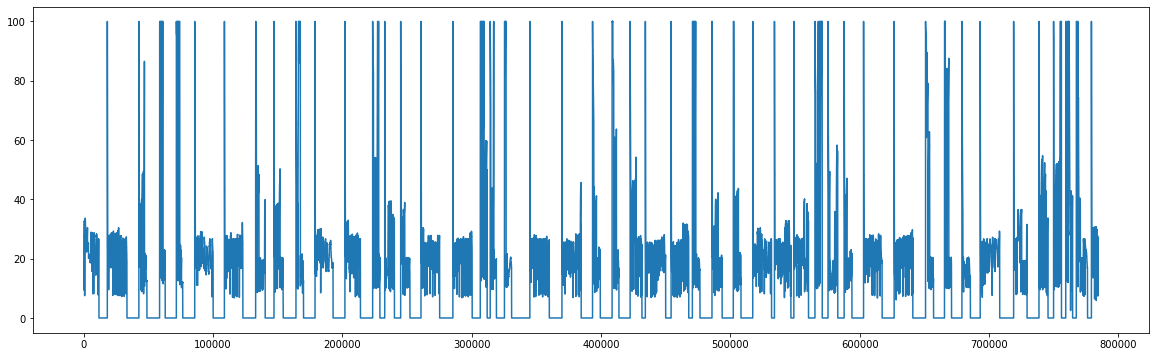

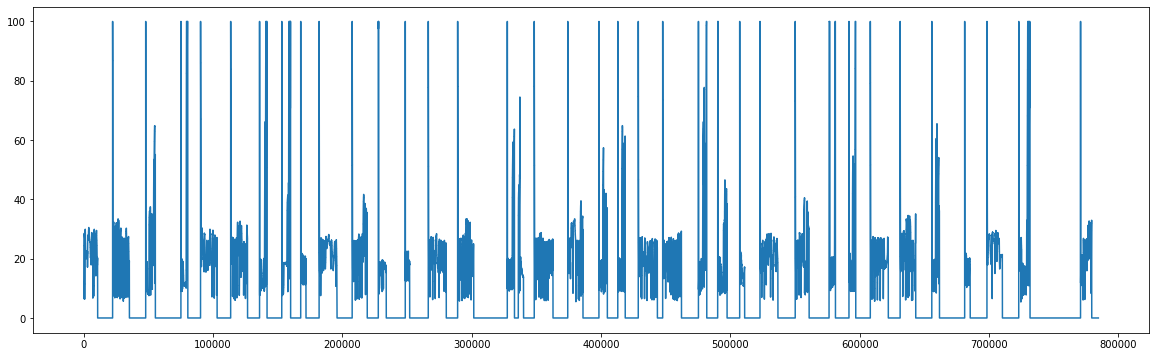

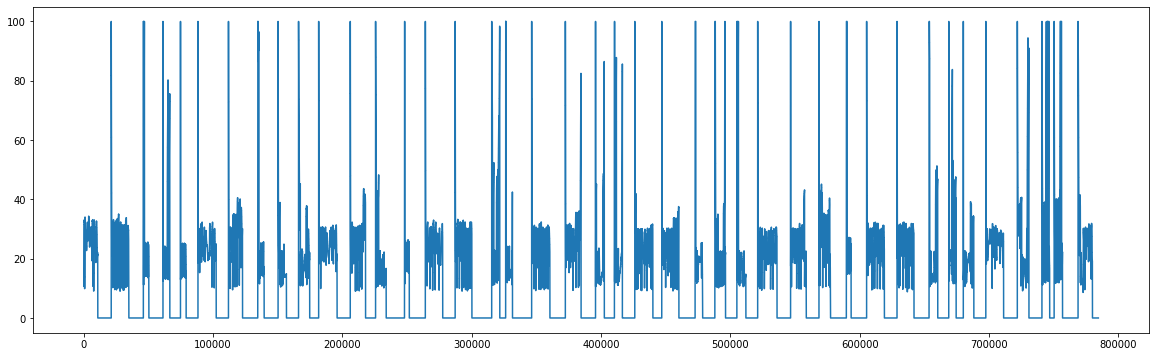

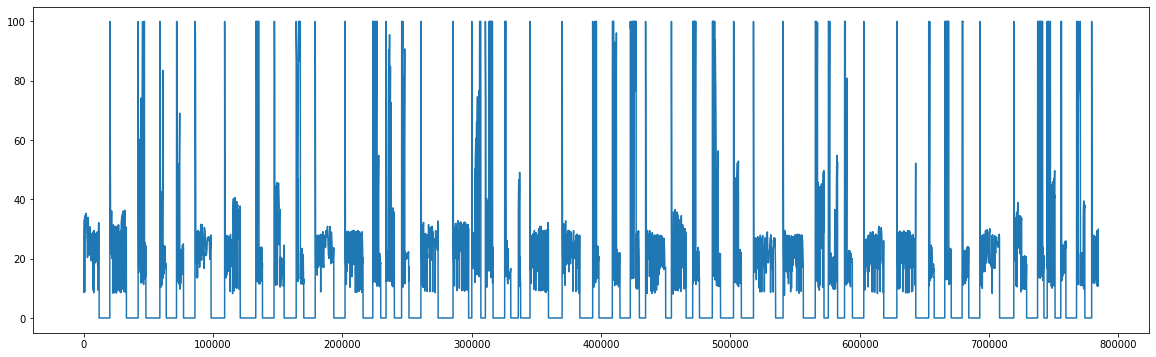

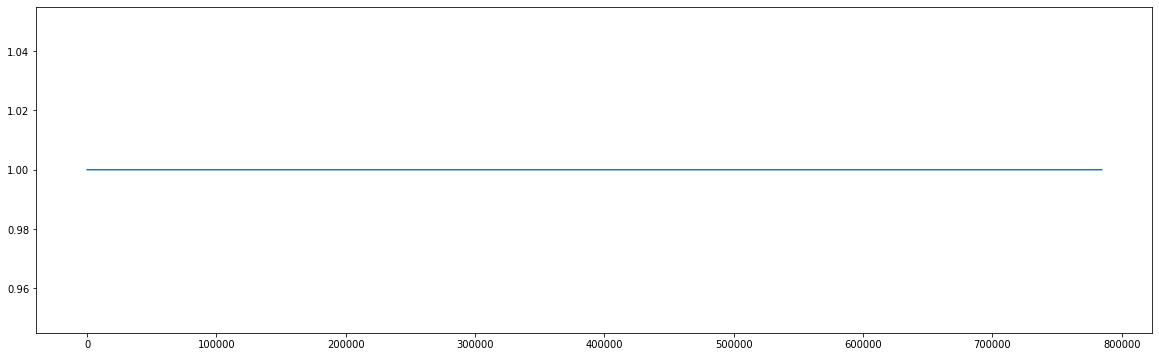

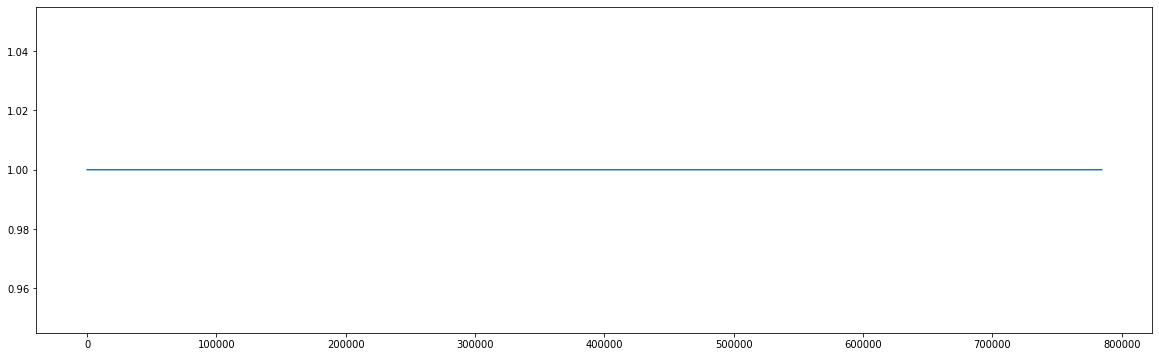

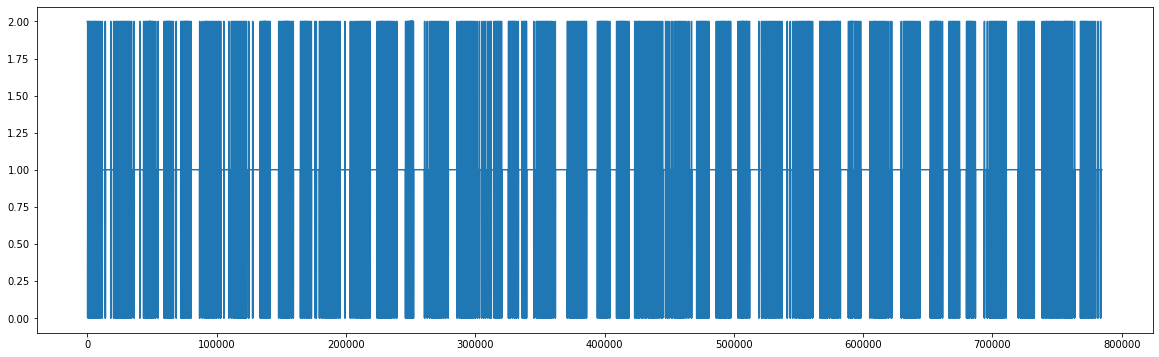

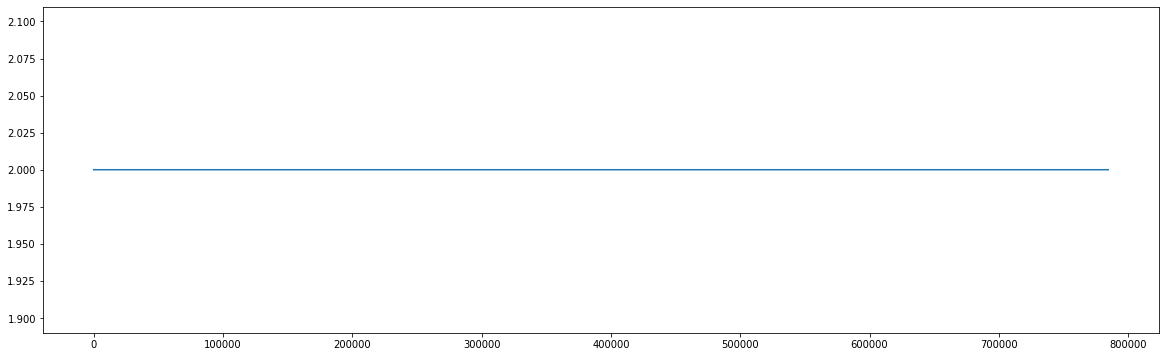

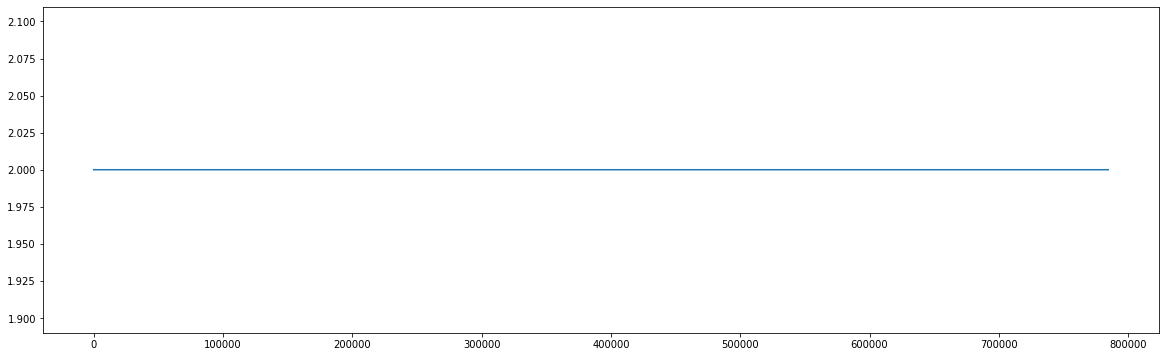

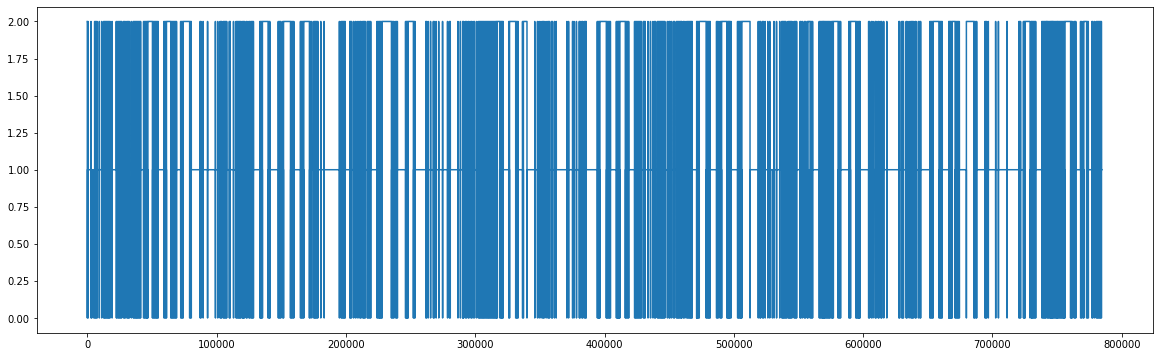

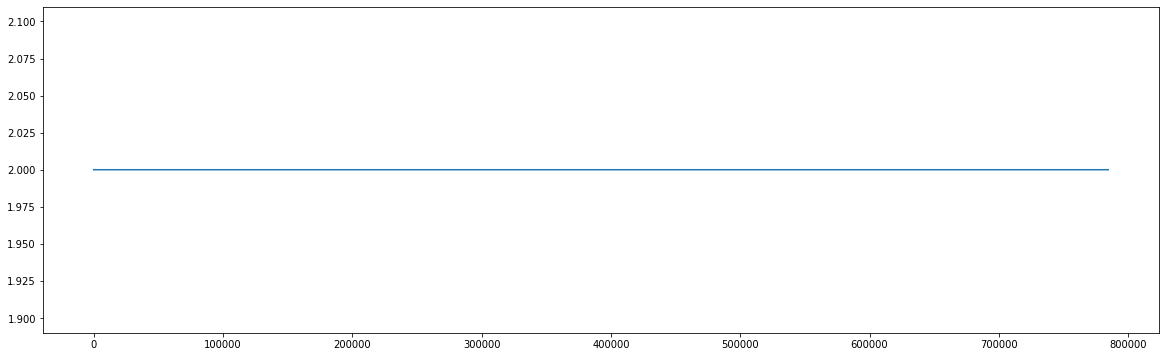

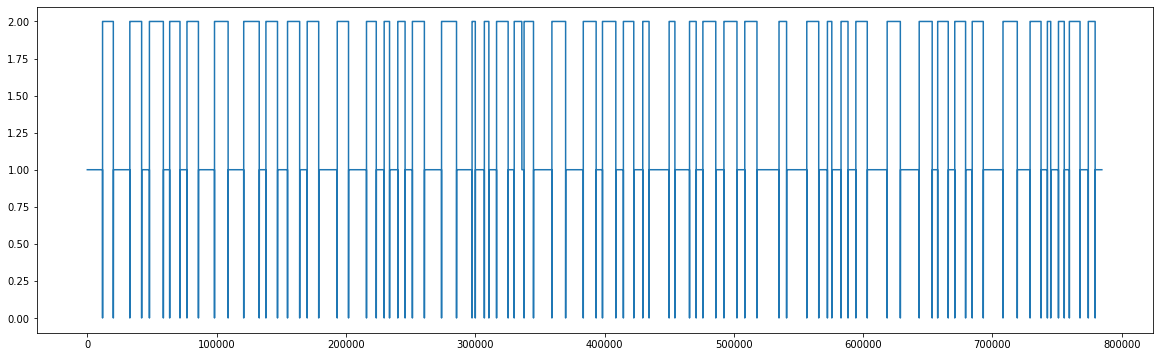

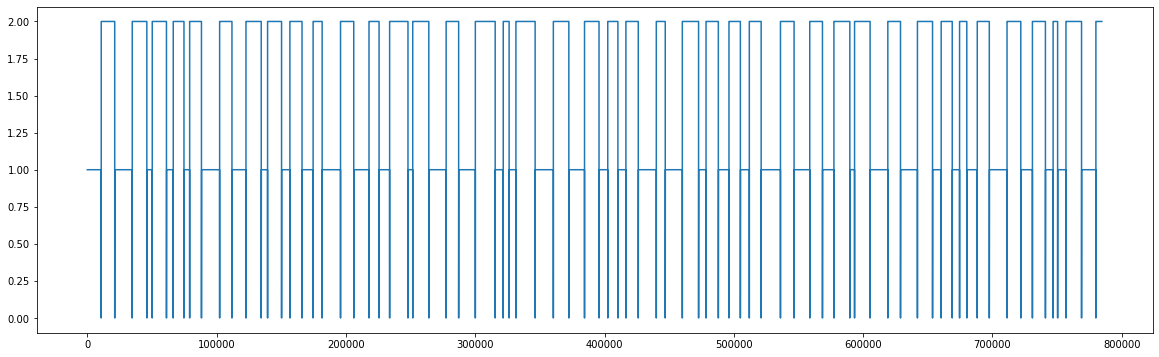

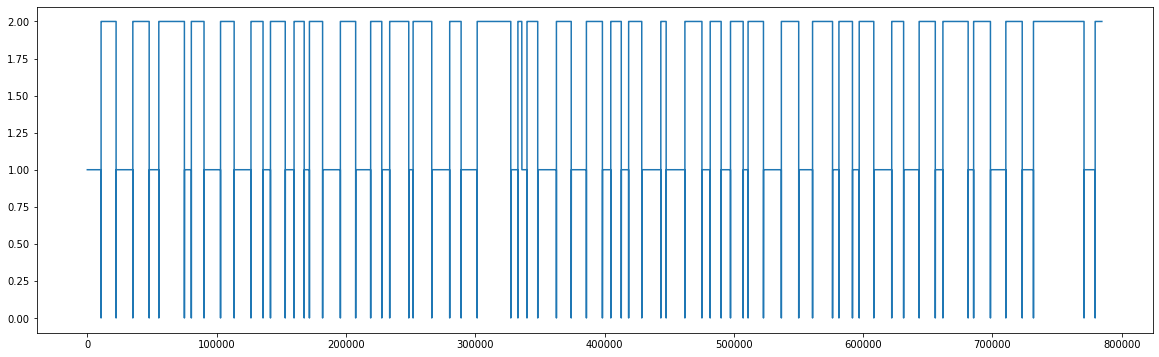

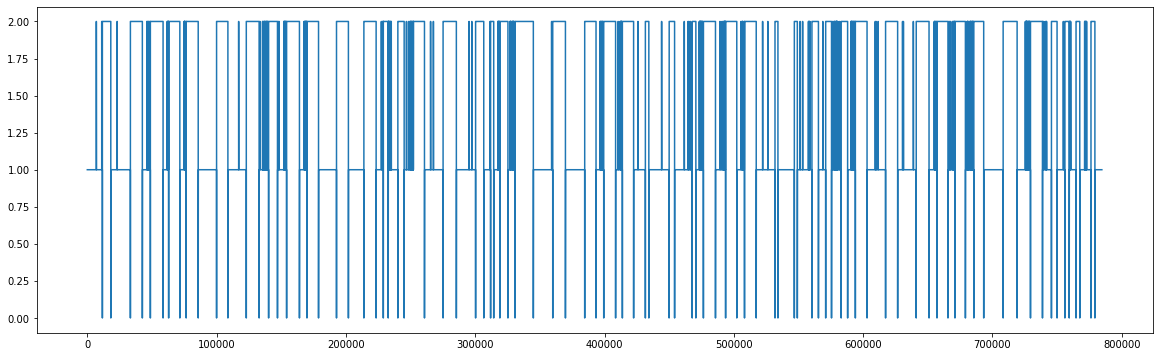

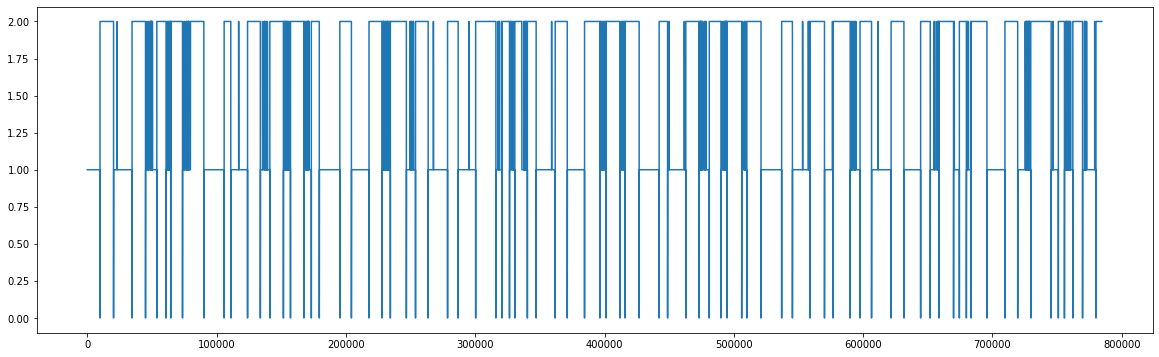

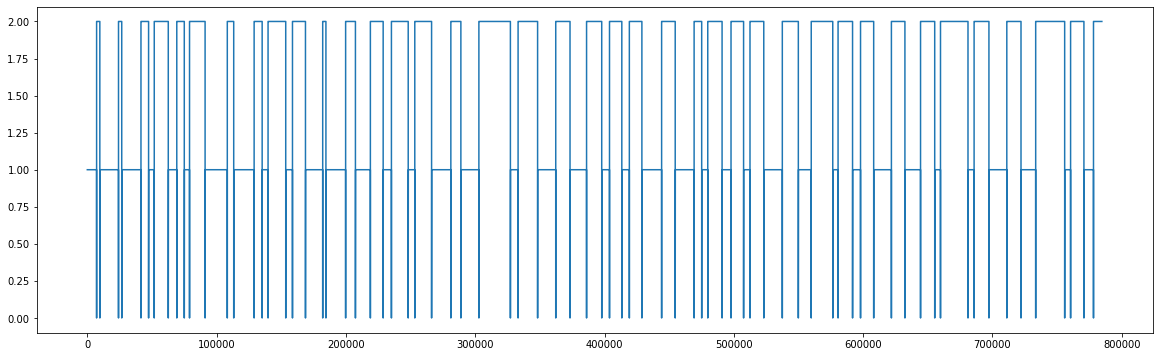

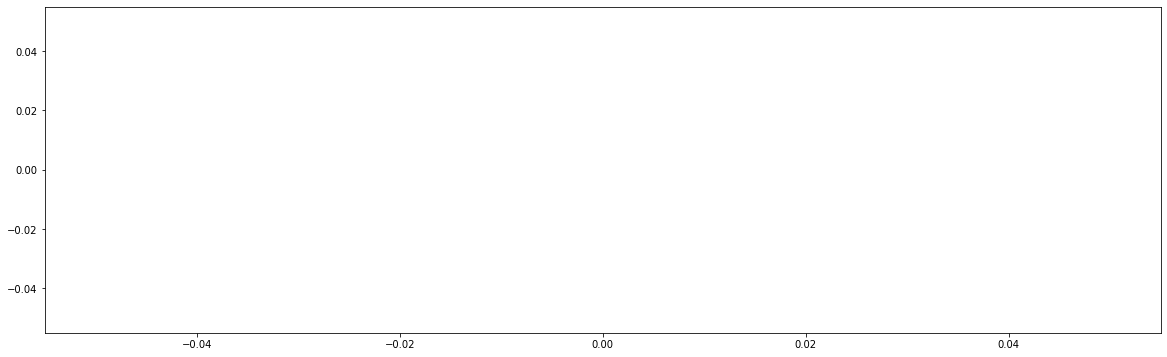

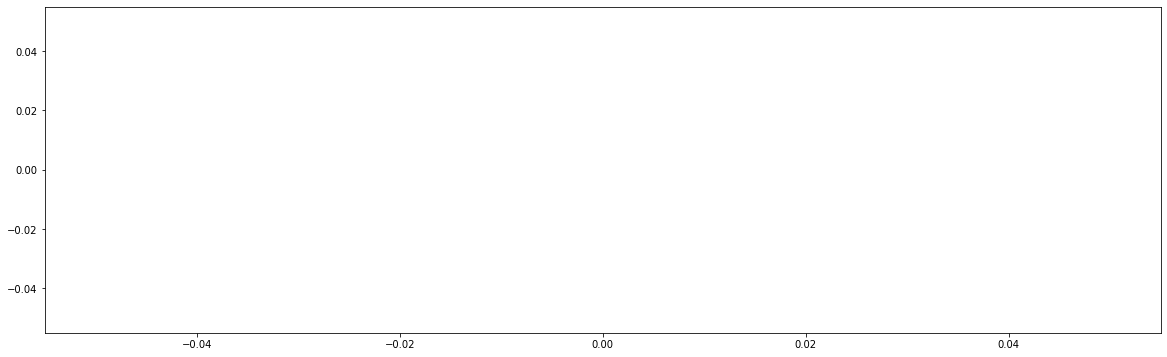

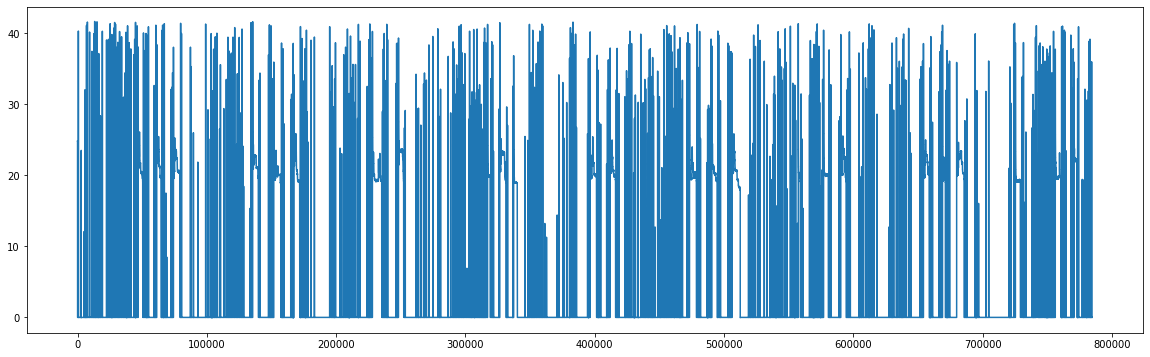

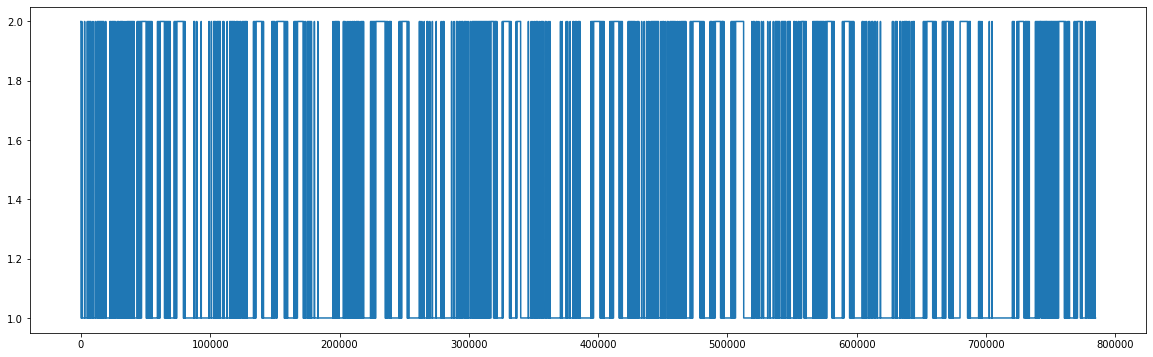

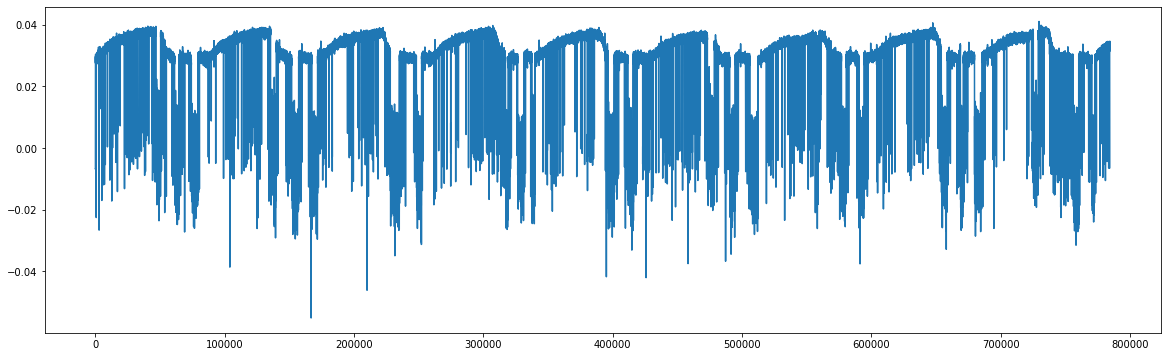

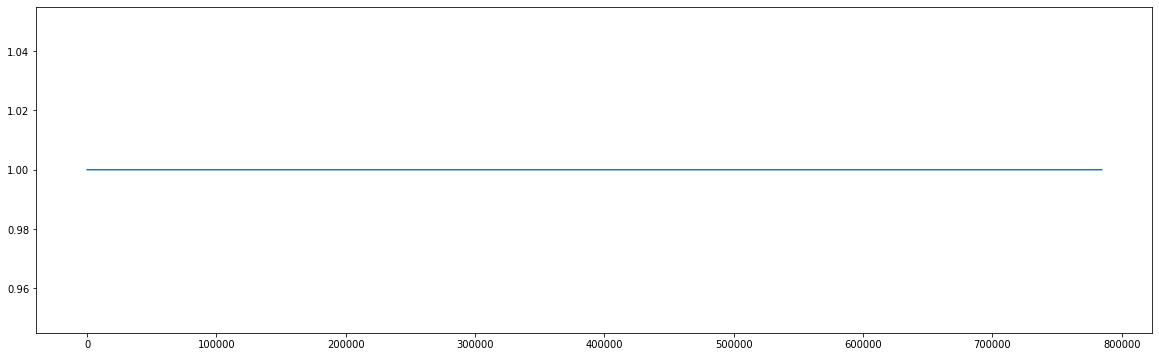

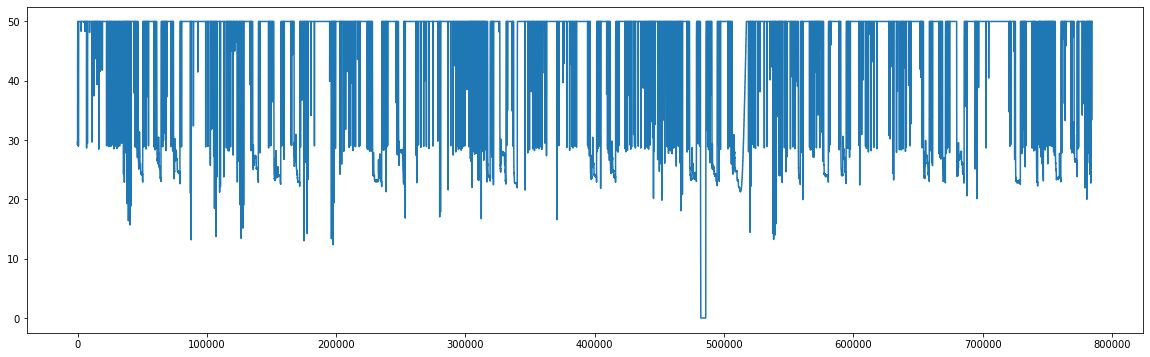

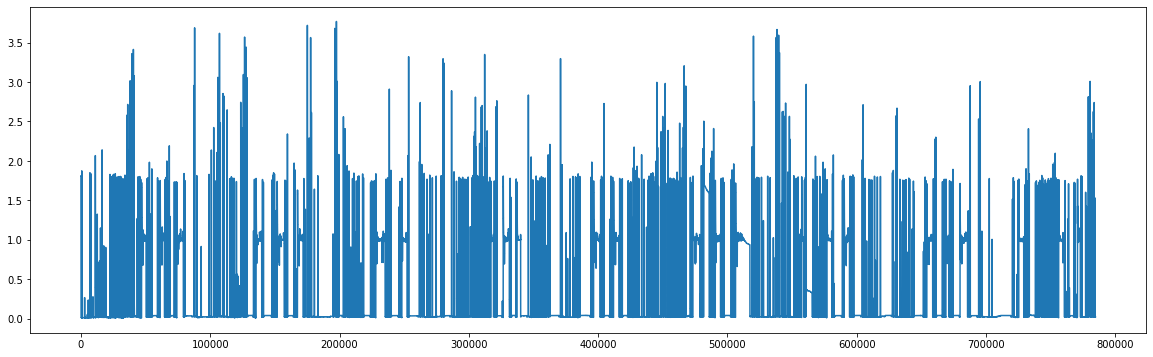

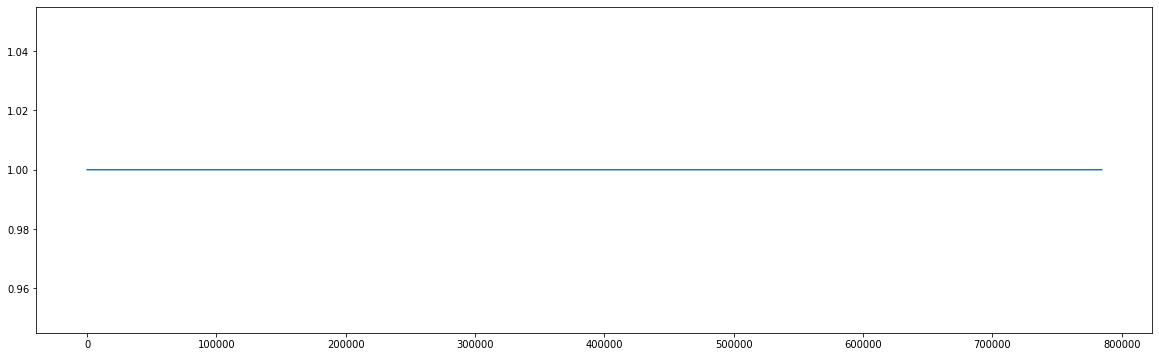

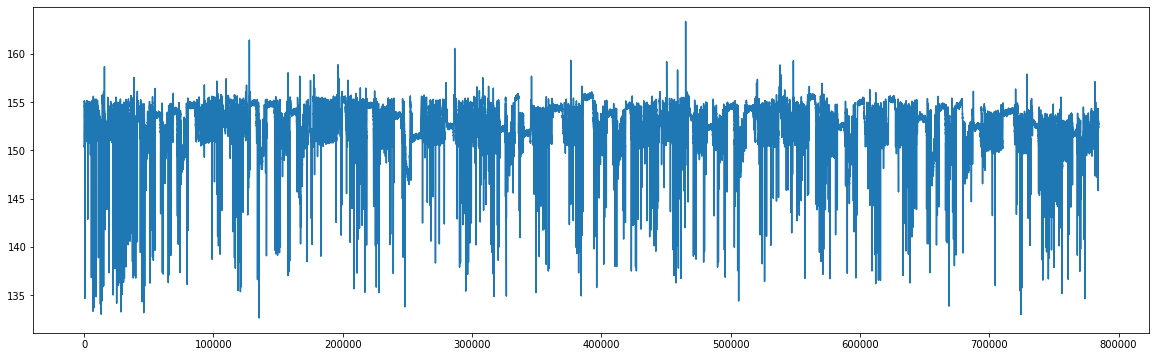

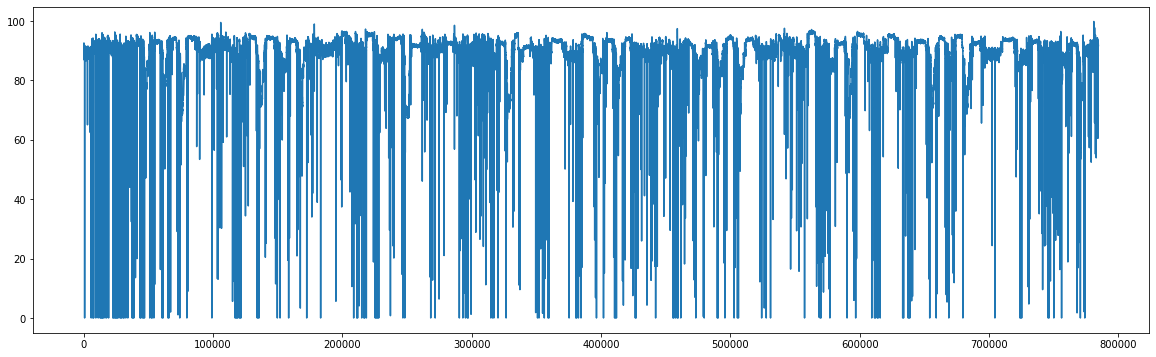

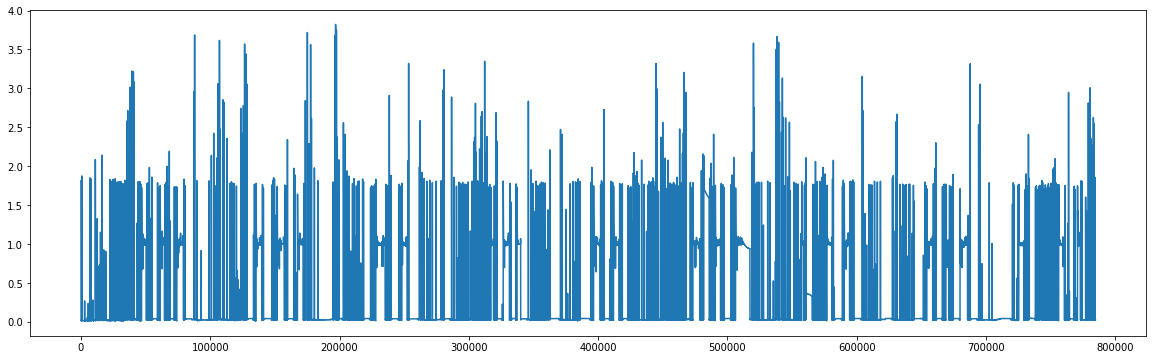

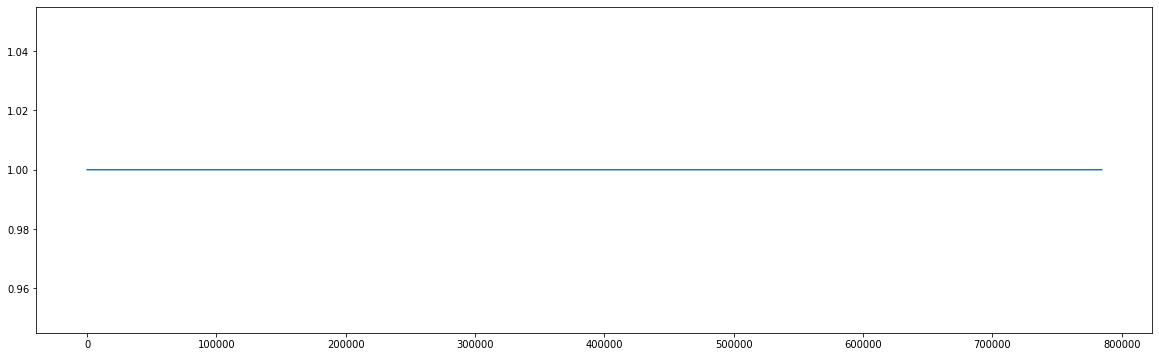

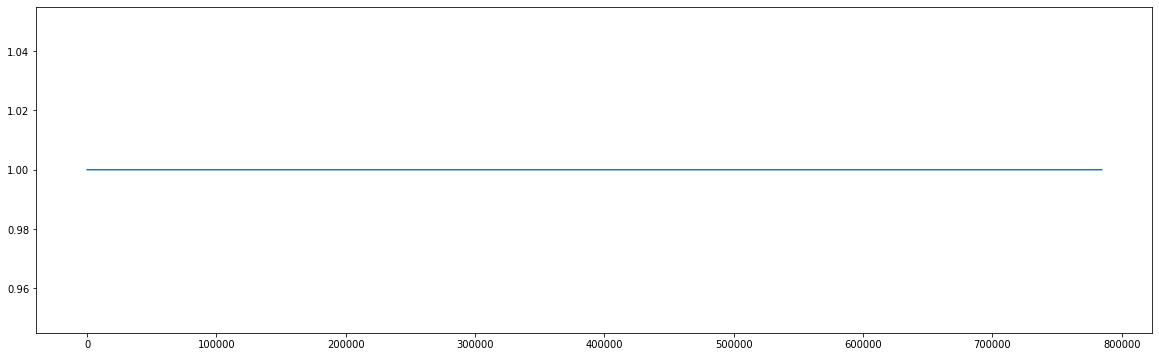

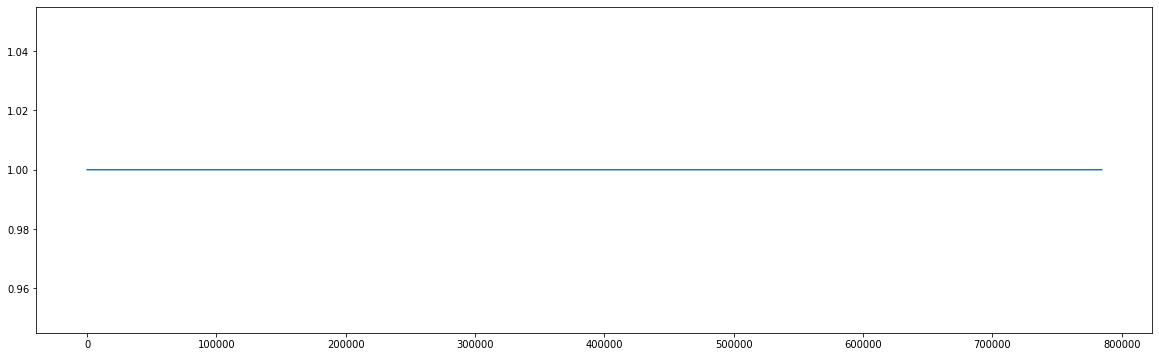

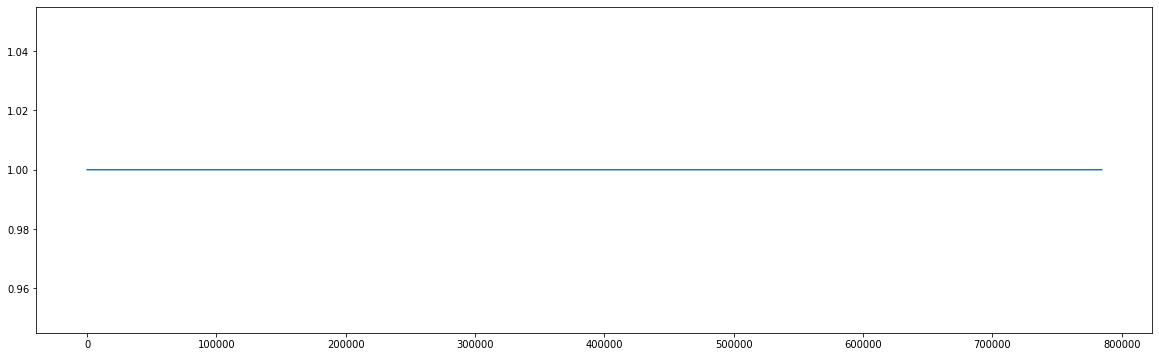

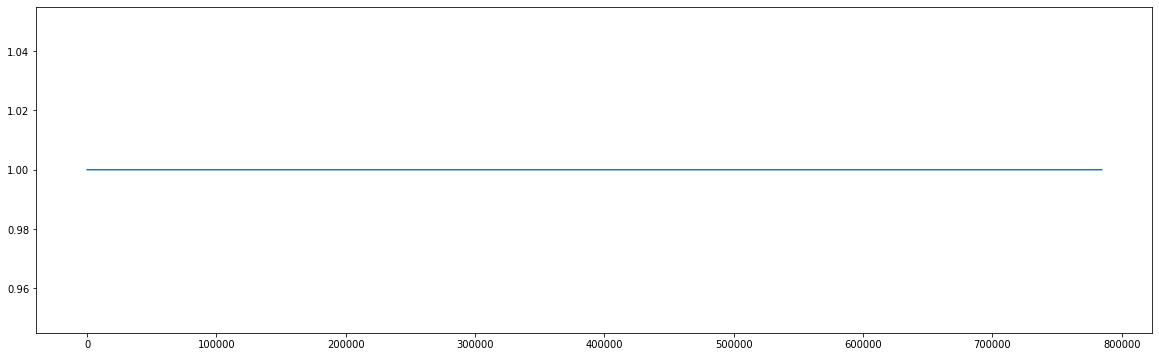

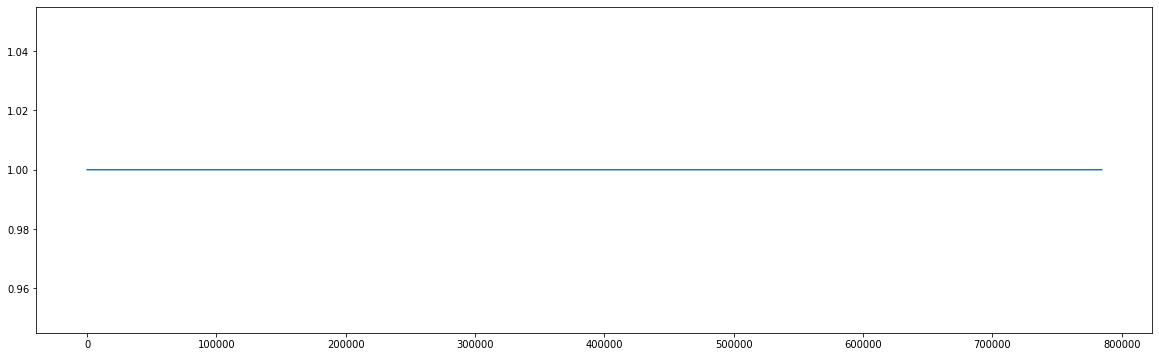

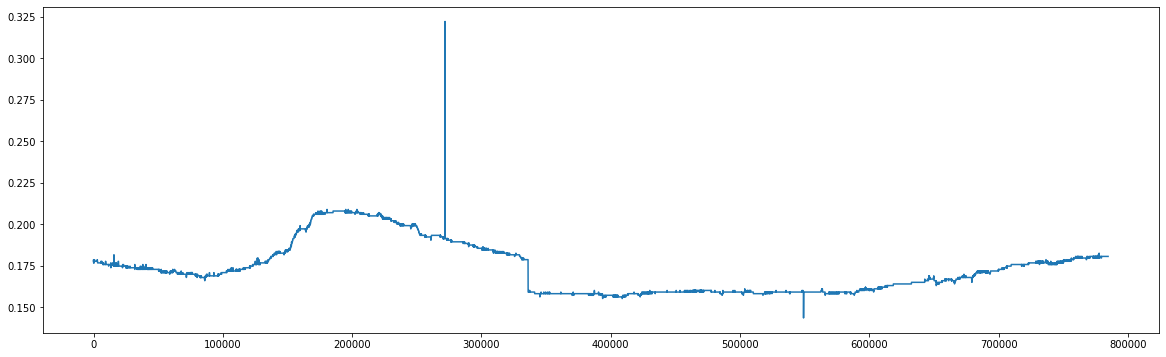

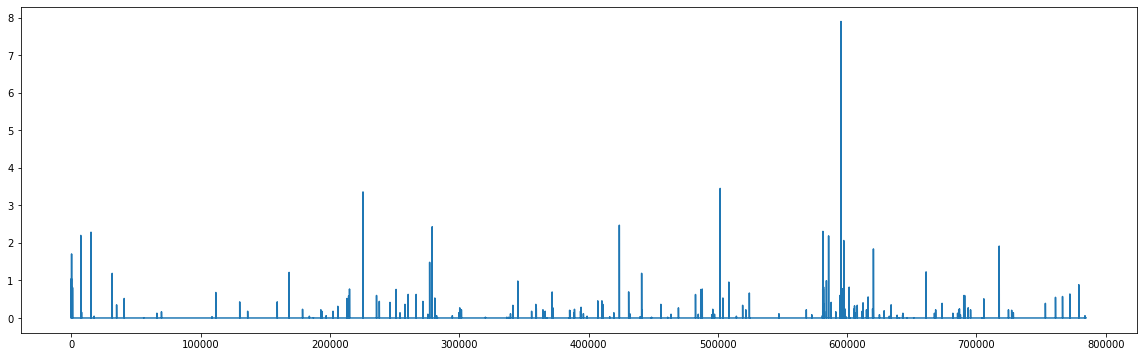

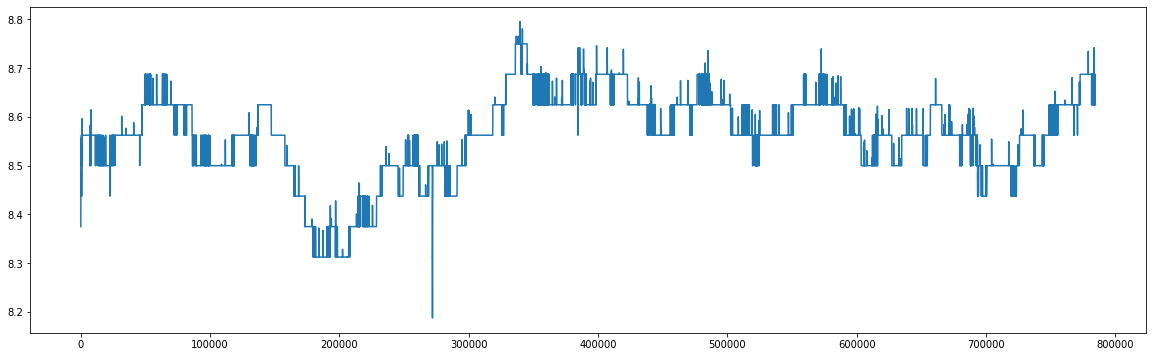

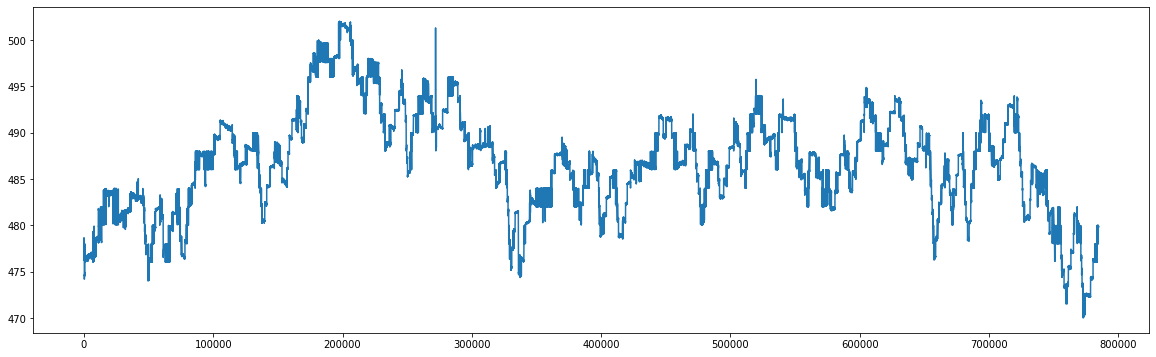

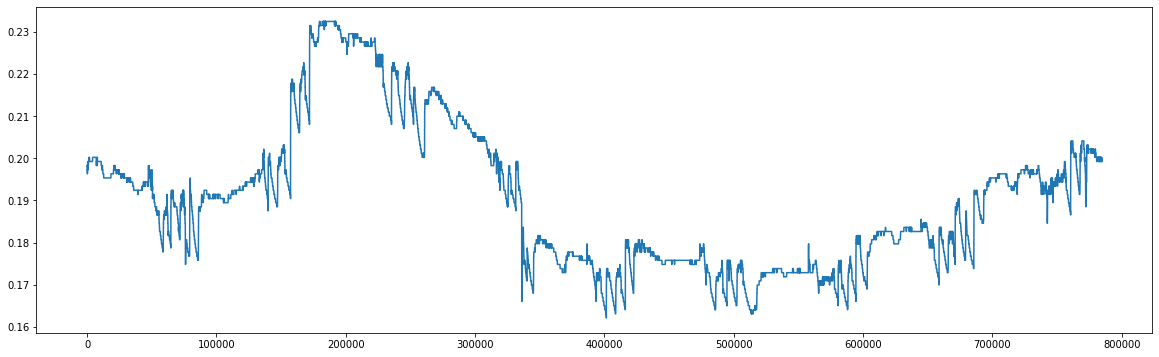

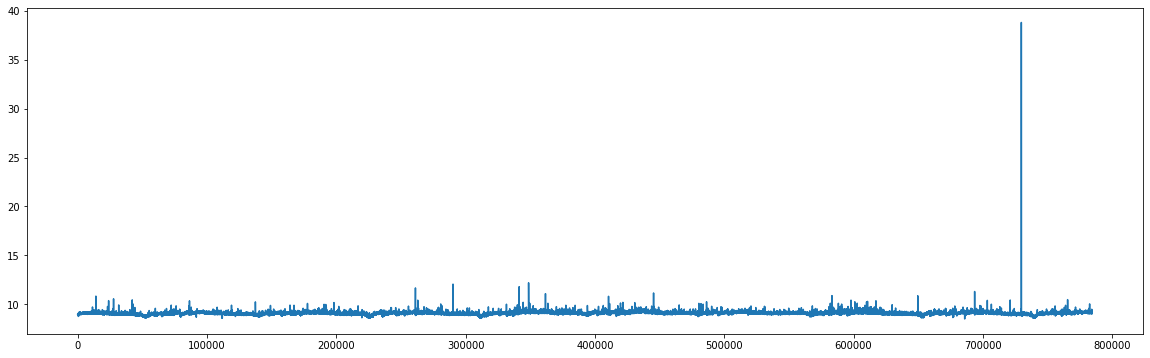

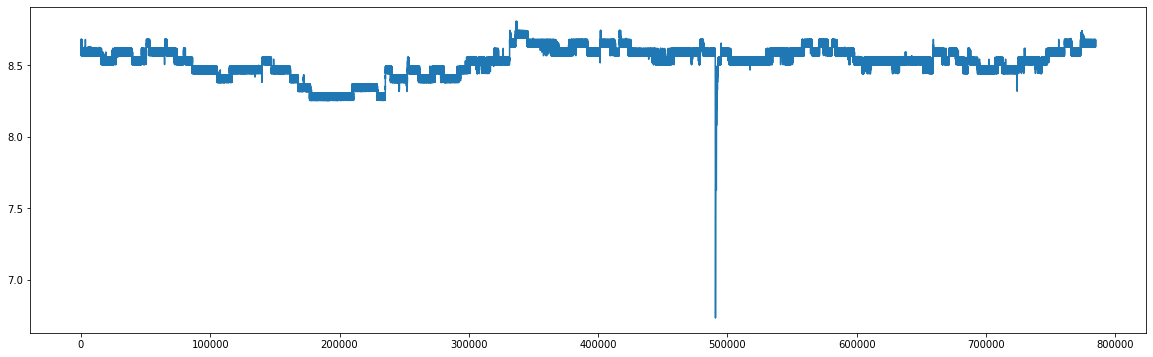

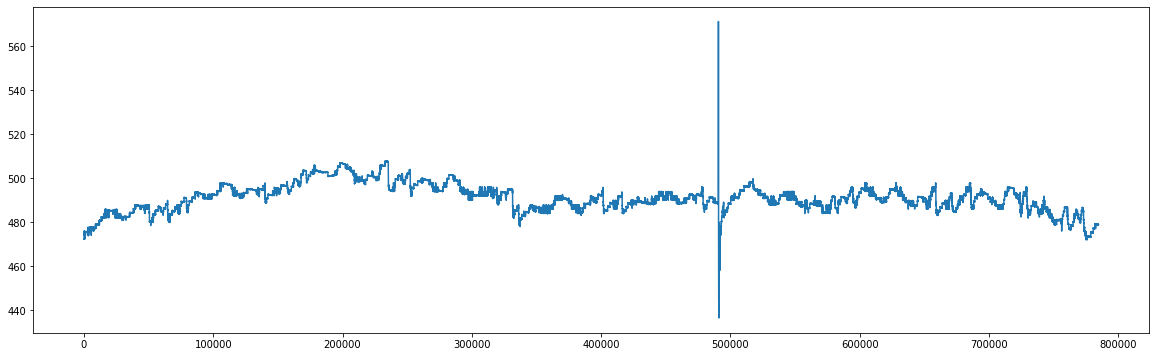

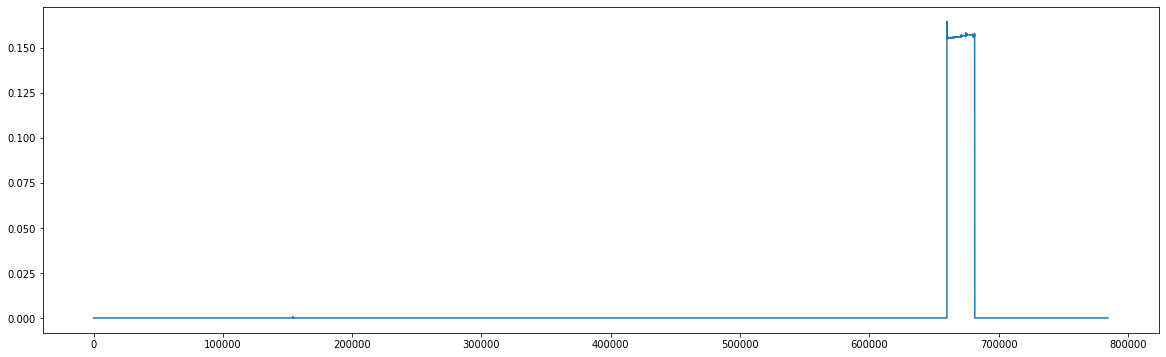

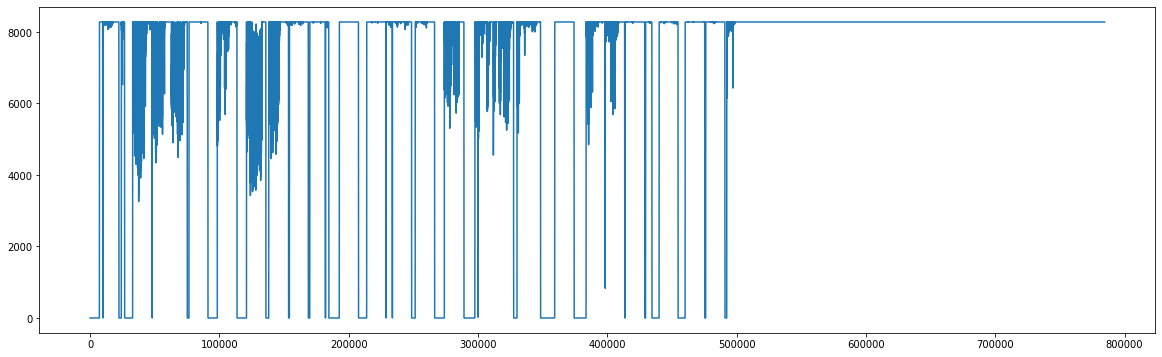

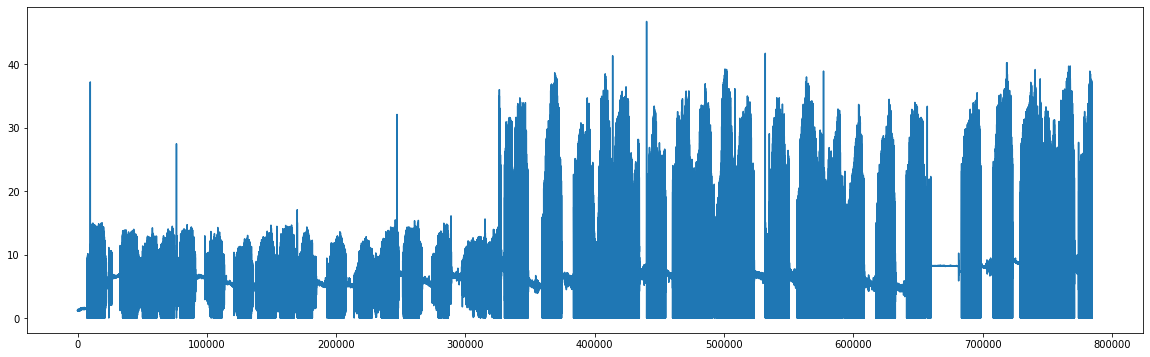

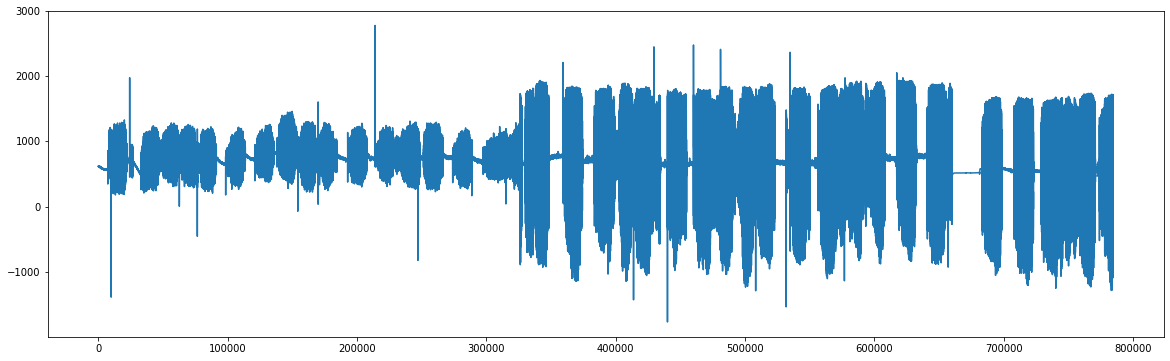

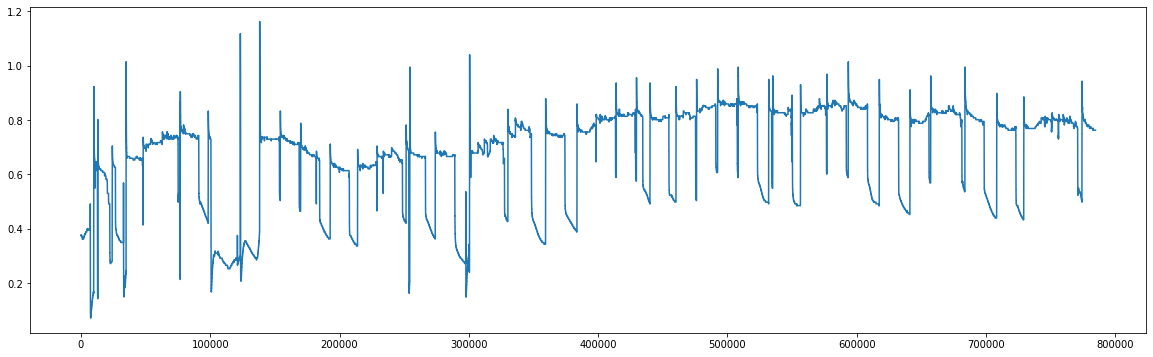

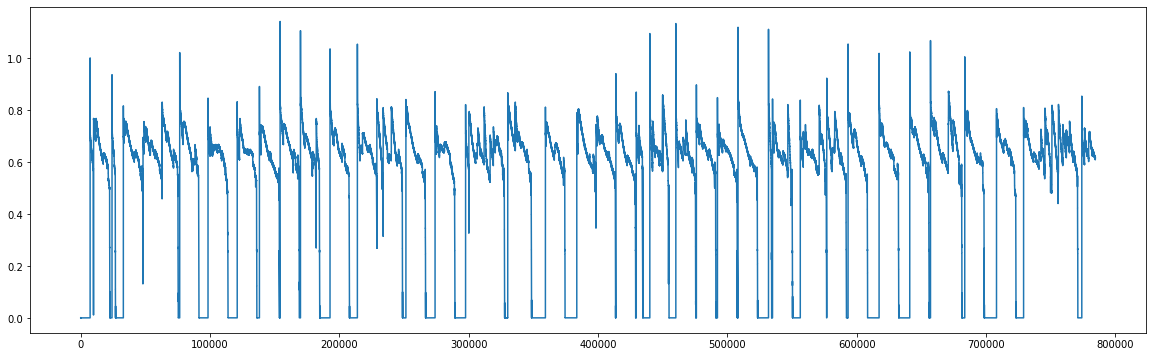

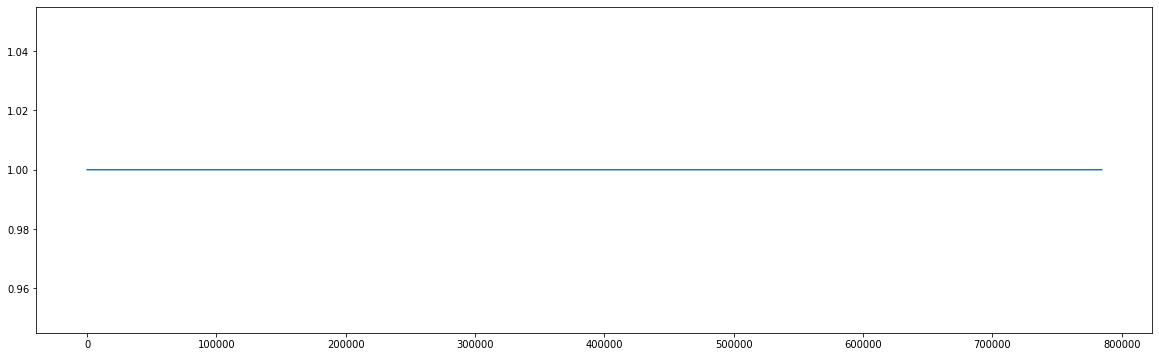

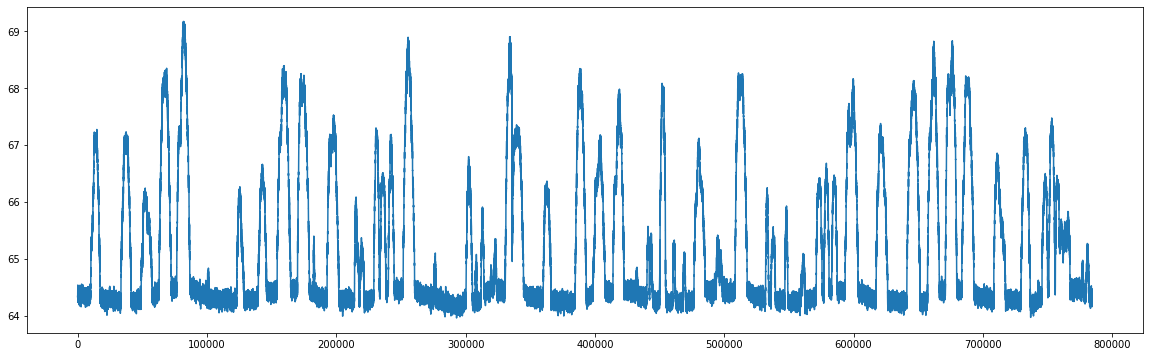

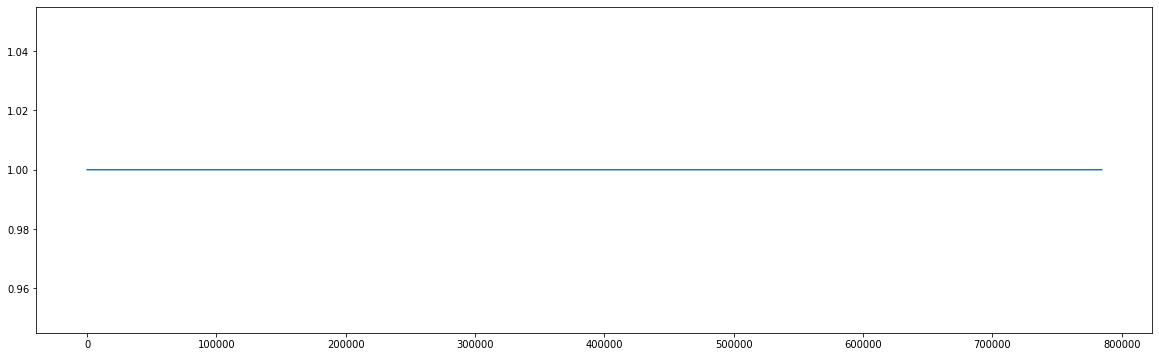

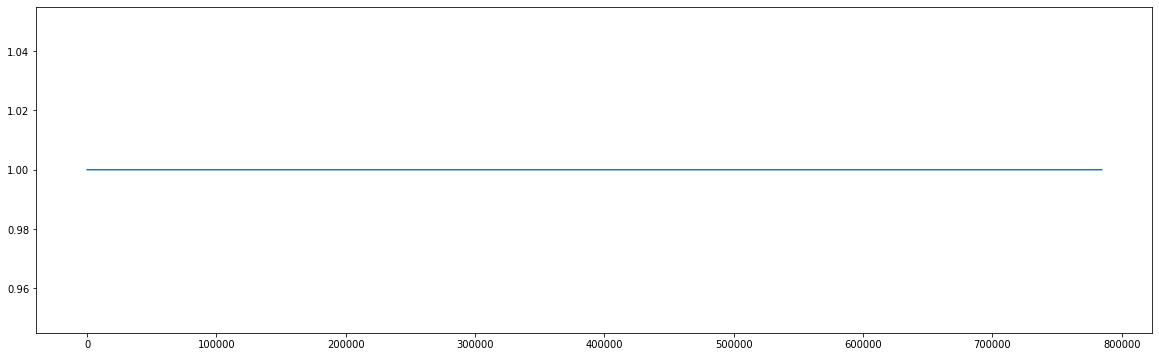

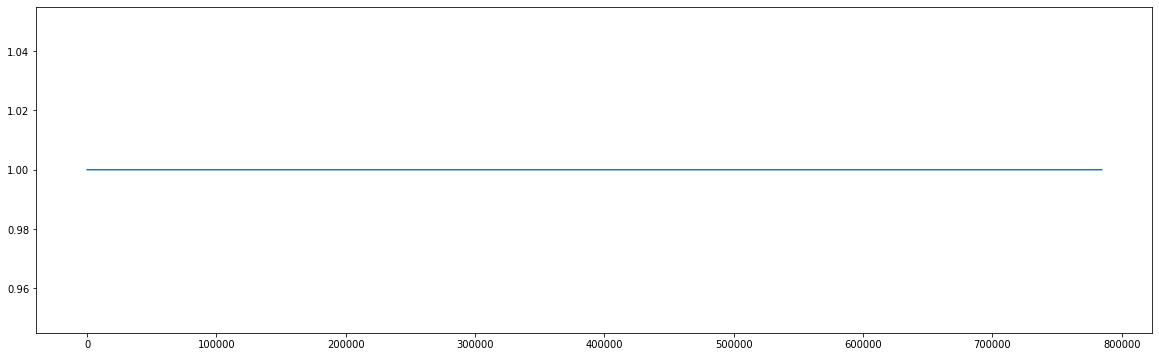

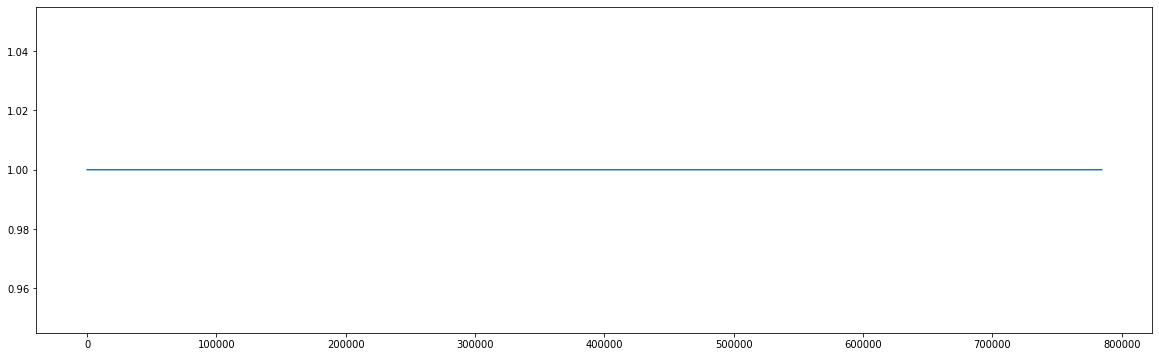

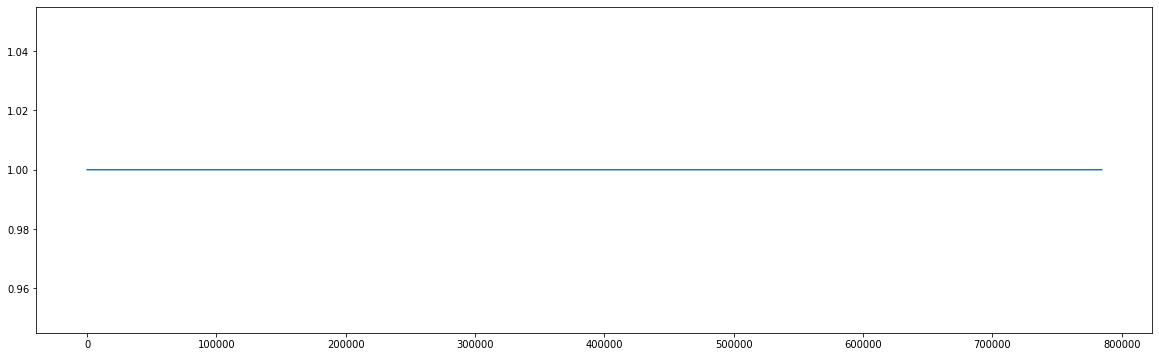

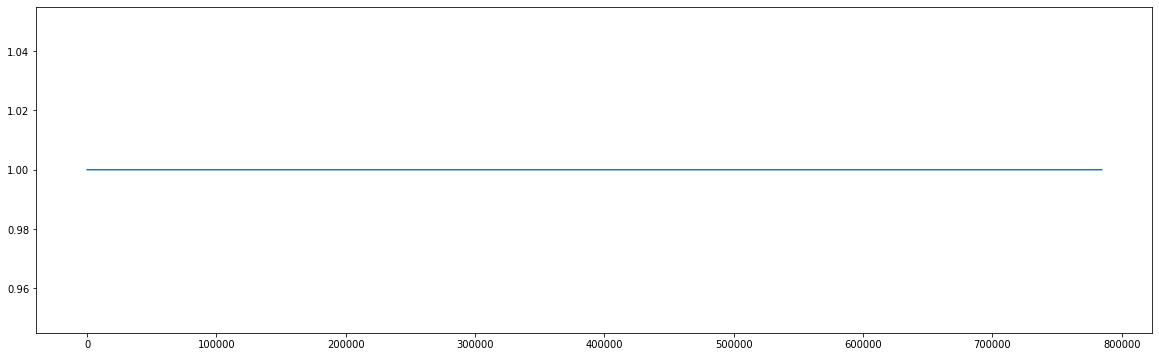

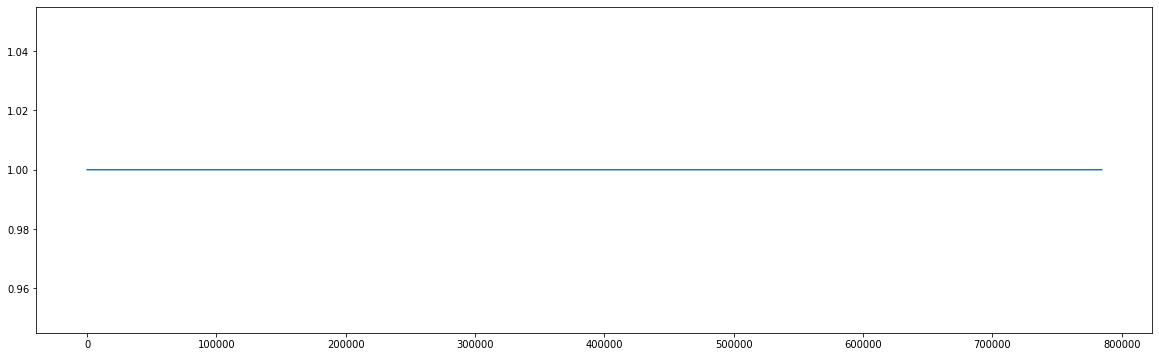

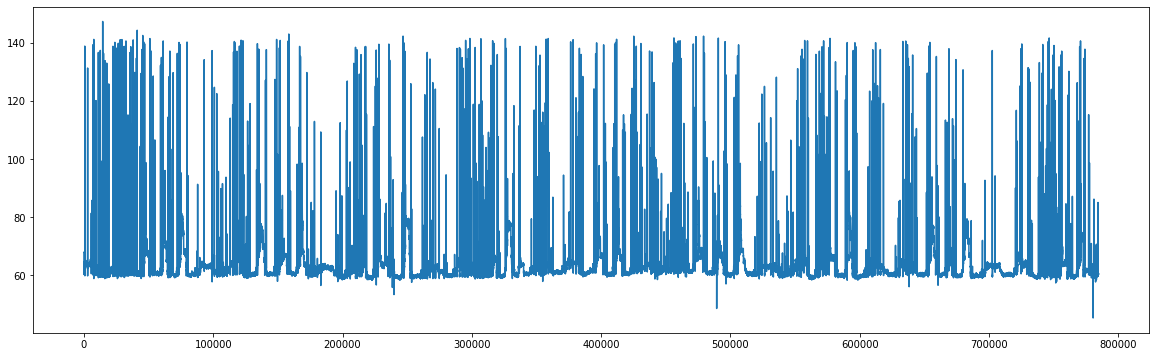

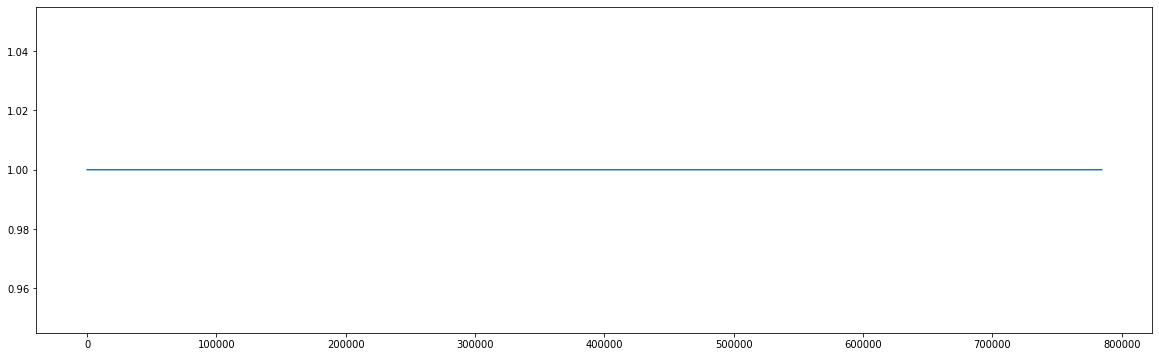

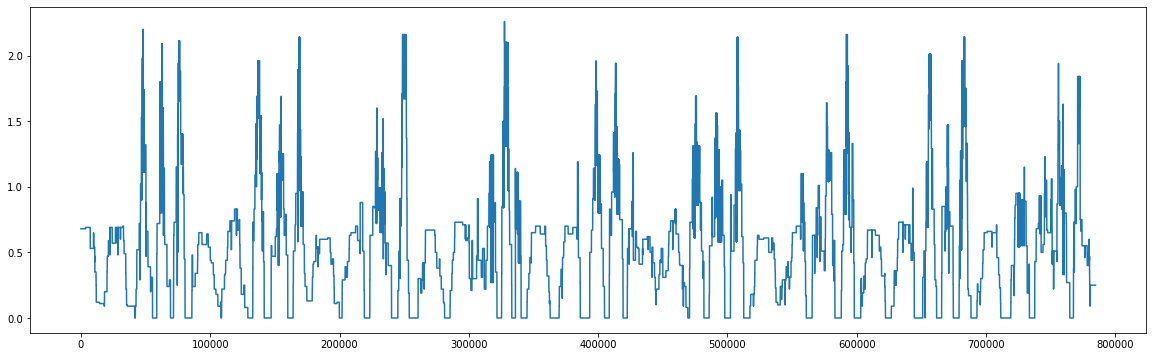

In [9]:
L, C = arr.shape
print(L, C)
for c in range(C):
    plt.figure(figsize=(20, 6))
    plt.plot(arr[:, c])
    plt.show()

## How are they different

In [3]:
from data.load_data import DataFactory

In [4]:
import torch
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt

from utils.metrics import get_summary_stats

from models.MLP import MLP

import wandb
import hydra
from omegaconf import DictConfig

from utils.logger import make_logger
from utils.argpass import prepare_arguments, configure_exp_id
from utils.tools import SEED_everything, plot_anomaly

import warnings
from data.load_data import DataFactory
from Exp.ReconBaselines import *

from easydict import EasyDict as edict
import yaml
import re

warnings.filterwarnings("ignore")

In [5]:
# load yaml
cfg = {}
loader = yaml.SafeLoader
loader.add_implicit_resolver(
    u'tag:yaml.org,2002:float',
    re.compile(u'''^(?:
     [-+]?(?:[0-9][0-9_]*)\\.[0-9_]*(?:[eE][-+]?[0-9]+)?
    |[-+]?(?:[0-9][0-9_]*)(?:[eE][-+]?[0-9]+)
    |\\.[0-9_]+(?:[eE][-+][0-9]+)?
    |[-+]?[0-9][0-9_]*(?::[0-5]?[0-9])+\\.[0-9_]*
    |[-+]?\\.(?:inf|Inf|INF)
    |\\.(?:nan|NaN|NAN))$''', re.X),
    list(u'-+0123456789.'))

# get cfg
model = "MLP"
with open("cfgs/test_defaults.yaml", "r") as file:
    basic_config = yaml.load(file, Loader=loader)
    cfg.update(basic_config)
with open(f"cfgs/model/{model}.yaml", "r") as file:
    model_config = yaml.load(file, Loader=loader)
    cfg.update({"model": model_config})
cfg['dataset'] = 'SWaT'

In [6]:
args = prepare_arguments(cfg)
args.model.latent_dim = 128
args.window_size = 12
args.eval_batch_size = 1
args.dataset = "SWaT"
print(args)

logger = make_logger(os.path.join(args.log_path, f'{args.exp_id}.log'))
logger.info(f"Configurations: {args}")

# Data
logger.info(f"Preparing {args.dataset} dataset...")
datafactory = DataFactory(args, logger)
train_dataset, train_loader, test_dataset, test_loader = datafactory()
args.num_channels = train_dataset.X.shape[1]
train_X, train_y, test_X, test_y = train_dataset.X, train_dataset.y, test_dataset.X, test_dataset.y

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

[2023-03-24 17:58:18,989] Configurations: {'exp_id': 'MLP_SWaT', 'dataset': 'SWaT', 'batch_size': 64, 'eval_batch_size': 1, 'window_size': 12, 'stride': 1, 'eval_stride': 12, 'scaler': 'std', 'load_previous_error': True, 'lr': 0.001, 'epochs': 30, 'log_freq': 10, 'checkpoint_path': './checkpoints\\MLP_SWaT', 'log_path': './logs\\MLP_SWaT', 'output_path': './outputs\\MLP_SWaT', 'plot_path': './plots\\MLP_SWaT', 'result_path': './results\\MLP_SWaT', 'thresholding': 'oracle', 'defaults': [{'model': 'OCSVM'}], 'model': {'name': 'MLP', 'latent_dim': 128}, 'home_dir': '.', 'device': device(type='cpu')}
[2023-03-24 17:58:18,990] Preparing SWaT dataset...
[2023-03-24 17:58:18,991] current location: C:\Users\Dongmin Kim\Documents\OnlineTSAD
[2023-03-24 17:58:18,992] home dir: .
[2023-03-24 17:58:18,993] Preparing SWaT ...


{'exp_id': 'MLP_SWaT', 'dataset': 'SWaT', 'batch_size': 64, 'eval_batch_size': 1, 'window_size': 12, 'stride': 1, 'eval_stride': 12, 'scaler': 'std', 'load_previous_error': True, 'lr': 0.001, 'epochs': 30, 'log_freq': 10, 'checkpoint_path': './checkpoints\\MLP_SWaT', 'log_path': './logs\\MLP_SWaT', 'output_path': './outputs\\MLP_SWaT', 'plot_path': './plots\\MLP_SWaT', 'result_path': './results\\MLP_SWaT', 'thresholding': 'oracle', 'defaults': [{'model': 'OCSVM'}], 'model': {'name': 'MLP', 'latent_dim': 128}, 'home_dir': '.', 'device': device(type='cpu')}


[2023-03-24 17:58:26,344] train: X - (496800, 51), y - (496800,) test: X - (449919, 51), y - (449919,)
[2023-03-24 17:58:26,426] Complete.
[2023-03-24 17:58:26,427] Preparing dataloader...
[2023-03-24 17:58:27,038] total train dataset- 7763, batch_X - torch.Size([64, 12, 51]), batch_y - torch.Size([64, 12])
[2023-03-24 17:58:27,039] total test dataset- 37493, batch_X - torch.Size([1, 12, 51]), batch_y - torch.Size([1, 12])
[2023-03-24 17:58:27,039] Complete.


(496800, 51) (496800,) (449916, 51) (449916,)


In [8]:
train_X.shape

(496800, 51)

In [9]:
test_X.shape

(449916, 51)

In [16]:
train_mu = train_X.mean(1)
test_mu = test_X.mean(1)
train_cov = np.cov(train_X.T)
test_cov = np.cov(test_X.T)

In [11]:
train_mu

array([-2.8189552 , -2.8193338 , -2.8196185 , ...,  0.13273148,
        0.12053533,  0.12136746], dtype=float32)

In [12]:
test_mu

array([ 0.12136746,  0.1255504 ,  0.12561463, ..., -0.35483727,
       -0.35941774, -0.36293092], dtype=float32)